In [1]:
%pylab
%matplotlib inline
import os
import pandas as pd
from IPython.display import Image

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


# other alpha test

latest attempt to build Universal Rotation Curve with the help of NN for MANGA data https://arxiv.org/pdf/2406.11987 (and many references therein)

Rix et al. 19997 RC (Tamburro uses or references it?): $$v = v_0 \times (1+x)^\beta \times (1+x^{-\gamma})^{-\frac{1}{\gamma}}, x=r/r_0$$

In [2]:
def rotvel_alpha(rs, alpha=0.):
    vel = np.power(rs, alpha)
    sm = np.sum(vel)
    return vel/sm

$$v(r) = v_0 \times (r/r_0)^{\alpha}$$

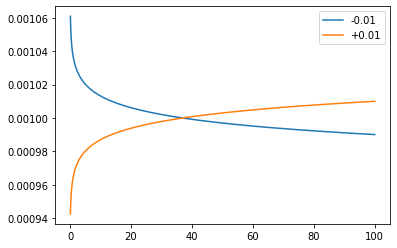

In [3]:
rs = np.linspace(0.1, 100, 1000)
v1 = rotvel_alpha(rs, alpha=-0.01)
v2 = rotvel_alpha(rs, alpha=0.01)
plt.plot(rs, v1, '-', label='-0.01')
plt.plot(rs, v2, '-', label='+0.01')
plt.legend()

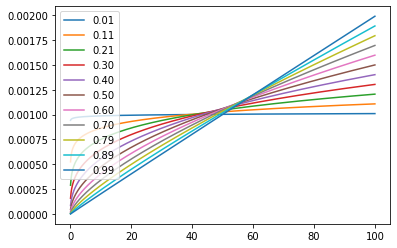

In [4]:
rs = np.linspace(0.1, 100, 1000)
for al in np.linspace(0.01, 0.99, 11):
    v1 = rotvel_alpha(rs, alpha=al)
    plt.plot(rs, v1, '-', label=f'{al:2.2f}')
plt.legend()

In [5]:
def resonance_alpha(alpha, m=0):
    rat = 1+sqrt(2)*sqrt(1+alpha)/m
    return np.power(rat, 1/(1-alpha))

In [6]:
resonance_alpha(0.5, m=2)

3.482050807568877

In [7]:
resonance_alpha(0.5, m=10000) #for CR

1.0003464401615136

(-1.0, 3.5)

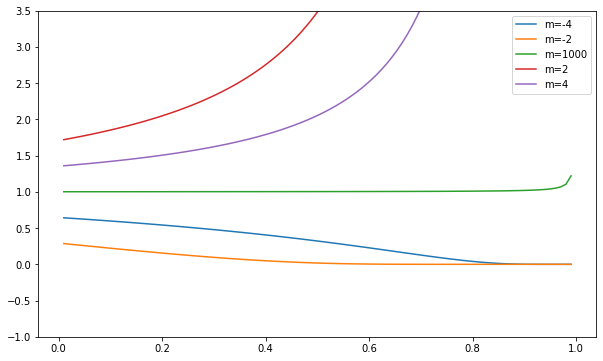

In [8]:
res_dict = {}
fig = plt.figure(figsize=[10, 6])
al= np.linspace(0.01, 0.99, 100)
for m_ in [-4, -2, 1000, 2, 4]:
    res = [resonance_alpha(al_, m=m_) for al_ in al]
    plt.plot(al, res, '-', label=f'm={m_}')
    res_dict[m_] = res
plt.legend()
plt.ylim(-1,3.5)

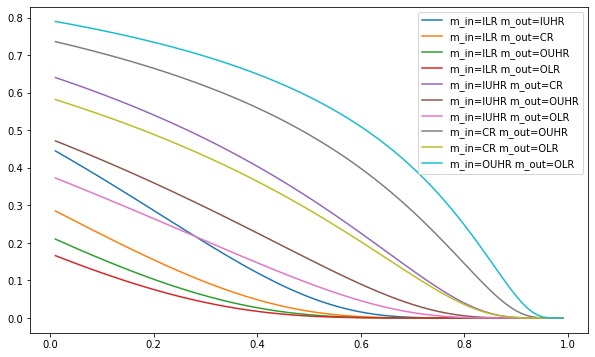

In [9]:
resonance_names = ['ILR', 'IUHR', 'CR', 'OUHR', 'OLR']

fig = plt.figure(figsize=[10, 6])
al= np.linspace(0.01, 0.99, 100)
for ind1,m1 in enumerate([-2, -4, 1000, 4, 2]):
    for ind2,m2 in enumerate([-2, -4, 1000, 4, 2]):
        res1 = res_dict[m1]
        res2 = res_dict[m2]
        if ind2<=ind1:
            continue
        res = np.array(res1)/np.array(res2)
        plt.plot(al, res, '-', label=f'm_in={resonance_names[ind1]} m_out={resonance_names[ind2]}')

plt.legend()
# plt.ylim(-1,3.5)

In [10]:
# for NGC3893
upomega_1 = 2.11
upomega_2 = 1.83

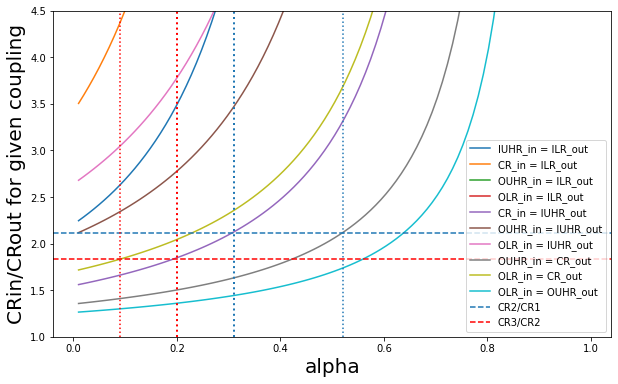

In [11]:
fig = plt.figure(figsize=[10, 6])
al= np.linspace(0.01, 0.99, 100)
for ind1,m1 in enumerate([-2, -4, 1000, 4, 2]):
    for ind2,m2 in enumerate([-2, -4, 1000, 4, 2]):
        res1 = res_dict[m1]
        res2 = res_dict[m2]
        if ind2<=ind1:
            continue
        res = np.array(res2)/np.array(res1)
#         plt.plot(al, res, '-', label=f'm_in={resonance_names[ind2]} m_out={resonance_names[ind1]}')
        plt.plot(al, res, '-', label=f'{resonance_names[ind2]}_in = {resonance_names[ind1]}_out')


plt.ylim(1.,4.5)
plt.axhline(y=upomega_1, ls='--', label='CR2/CR1')
plt.axvline(x=0.31, ls=':', lw=2)
plt.axvline(x=0.52, ls=':')

plt.axhline(y=upomega_2, ls='--', c='r', label='CR3/CR2')
plt.axvline(x=0.2, ls=':', c='r', lw=2)
plt.axvline(x=0.09, ls=':', c= 'r')


# plt.axhline(y=1.71, ls='--', c='g', label='NGC628')

plt.xlabel('alpha', fontsize=20)
plt.ylabel('CRin/CRout for given coupling', fontsize=20)
plt.legend()
plt.show()

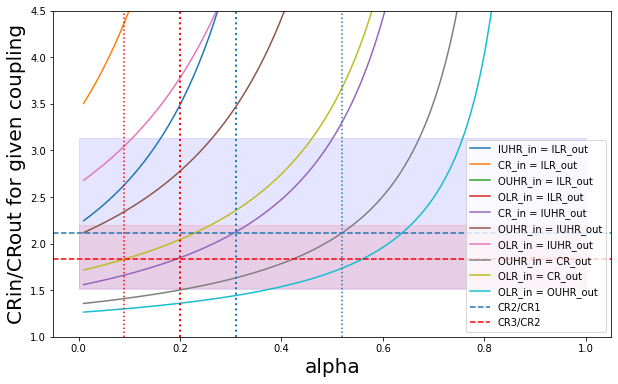

In [12]:
fig = plt.figure(figsize=[10, 6])
al= np.linspace(0.01, 0.99, 100)
for ind1,m1 in enumerate([-2, -4, 1000, 4, 2]):
    for ind2,m2 in enumerate([-2, -4, 1000, 4, 2]):
        res1 = res_dict[m1]
        res2 = res_dict[m2]
        if ind2<=ind1:
            continue
        res = np.array(res2)/np.array(res1)
#         plt.plot(al, res, '-', label=f'm_in={resonance_names[ind2]} m_out={resonance_names[ind1]}')
        plt.plot(al, res, '-', label=f'{resonance_names[ind2]}_in = {resonance_names[ind1]}_out')


# (12.5 , 21.2), (32.0, 39.1), (59.5,70.5)
    
    
plt.ylim(1.,4.5)
plt.axhline(y=upomega_1, ls='--', label='CR2/CR1')
plt.fill_between([0.,1.], 39.1/12.5, 32.0/21.2, color='b', alpha=0.1)
plt.axvline(x=0.31, ls=':', lw=2)
plt.axvline(x=0.52, ls=':')

plt.axhline(y=upomega_2, ls='--', c='r', label='CR3/CR2')
plt.fill_between([0.,1.], 70.5/32.0, 59.5/39.1, color='r', alpha=0.1)
plt.axvline(x=0.2, ls=':', c='r', lw=2)
plt.axvline(x=0.09, ls=':', c= 'r')


# plt.axhline(y=1.71, ls='--', c='g', label='NGC628')

plt.xlabel('alpha', fontsize=20)
plt.ylabel('CRin/CRout for given coupling', fontsize=20)
plt.legend()
plt.show()

In [13]:
rot_data = {'NGC3893': [[array([10.67669173, 11.74299385, 12.91866029, 15.47505126, 20.58783322,
          25.72795625, 32.20779221, 41.32604238, 53.13738893, 62.3239918 ,
          78.18181818,  4.6479836 ,  9.55570745, 18.38687628, 22.20095694,
          27.35475051, 32.53588517, 41.66780588, 54.79152427, 71.93438141,
          89.18660287]),
   array([ 37.47290107,  63.42069483,  78.4399239 ,  87.98732329,
          107.08212207, 123.44477967, 138.43381935, 154.7738349 ,
          167.000544  , 176.51020663, 181.88392075,  21.17756584,
           60.76342338, 105.79092121, 122.16112617, 137.15771319,
          149.42215904, 164.39610401, 177.98133634, 187.44571487,
          185.98152872]),
   'WHISP'],
  [array([ 15.75013798,  32.46340307,  49.50924799,  66.01784857,
           83.74841666, 103.5978644 ]),
   array([144.40901072, 173.54729271, 193.820057  , 189.95250373,
          186.09037861, 188.64160673]),
   'SV98'],
  [array([  5.79538804,   9.7164861 ,  14.01429126,  18.11282525,
           20.24048274,  21.98435141,  26.42359386,  30.1135531 ,
           34.18671099,  38.25750832,  40.22130313,  41.95041826,
           46.40677483,  50.09555377,  54.360311  ,  58.44645202,
           59.79531919,  62.12401827,  65.97606975,  69.82162968,
           74.46250387,  78.135349  ,  80.4799819 ,  82.21499845,
           85.53356185,  89.97634515,  94.03592979,  98.12915251,
          101.99772795, 101.16110376, 106.41690559, 108.34765247]),
   array([ 83.57540149, 107.64087349, 127.20955018, 144.13345071,
          144.3959373 , 145.98126862, 142.27412503, 149.41204325,
          154.96262085, 159.45521492, 172.94267827, 167.91561255,
          171.87884953, 178.48777599, 183.24468328, 194.61417029,
          192.49692459, 196.19767498, 189.31712879, 179.5271279 ,
          179.52274399, 178.99028163, 189.83242084, 187.45031393,
          201.46549041, 199.34532211, 198.81249442, 213.35593201,
          213.88127052, 185.5809418 , 201.18126694, 199.8569609 ]),
   'GHASP']],}

[ 0.37128007 41.57928379]
[ 0.33571956 47.58452175]


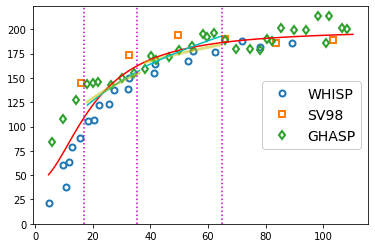

In [14]:
from scipy.optimize import curve_fit
from scipy.interpolate import CubicSpline
import scipy.interpolate as interpolate


def simple_velocity_approx(x, a, b, c):
    return a * x**2/(b**2+x**2)+c

def rotvel_alpha(x, alpha, vmax):
    vel = np.power(x, alpha)
    return vmax*vel


VER_REL_ERR=0.07
    
rot_approx = {}

for ind, name_ in enumerate(['NGC3893']):
    ax = plt.gca()
    comb_rot = None
    fnames = rot_data[name_]
    label_i = 0
    for xx,yy,label in fnames:
        ax.plot(xx, yy, ['o', 's', 'd'][label_i], label=label, markerfacecolor="None", markeredgewidth=2)
        
        if comb_rot is None:
            comb_rot = np.array([xx, yy]).T
        else:
            comb_rot = np.concatenate([comb_rot, np.array([xx, yy]).T])
        
        label_i += 1
    
#     if name_ == 'NGC5371':
#         comb_rot = np.concatenate([comb_rot, np.array([[0], [0]]).T])
    
    comb_rot = comb_rot[comb_rot[:, 0].argsort()]
    
    try:
        param, param_cov = curve_fit(simple_velocity_approx, comb_rot[:,0], comb_rot[:,1])
        
        points = np.linspace(min(comb_rot[:,0]), max(comb_rot[:,0])+2, 100)
        ax.plot(points, simple_velocity_approx(points, param[0], param[1], param[2]), color='r')
        
#         vo=simple_velocity_approx(points, param[0], param[1], param[2])
#         ax.fill_between(points, vo*(1-VER_REL_ERR), vo*(1+VER_REL_ERR), color='r', alpha=0.3)
        
        rot_approx[name_] = [points,param]
        
        mask = (comb_rot[:,0] > 16.8) & (comb_rot[:,0] < 35.5)
        param, param_cov = curve_fit(rotvel_alpha, comb_rot[mask,0], comb_rot[mask,1])
        points = np.linspace(min(comb_rot[mask, 0]), max(comb_rot[mask, 0])+2, 100)
        ax.plot(points, rotvel_alpha(points, param[0], param[1]), color='c')
        print(param)     
        
        ax.plot(points, rotvel_alpha(points, 0.31, 51), color='y', lw=3, alpha=0.5)
        mask = (comb_rot[:,0] > 35.5) & (comb_rot[:,0] < 65)
        points = np.linspace(min(comb_rot[mask, 0]), max(comb_rot[mask, 0])+2, 100)
        ax.plot(points, rotvel_alpha(points, 0.2, 80), color='y', lw=3, alpha=0.5)
        
        mask = (comb_rot[:,0] > 35.5) & (comb_rot[:,0] < 65)
        param, param_cov = curve_fit(rotvel_alpha, comb_rot[mask,0], comb_rot[mask,1])
        points = np.linspace(min(comb_rot[mask, 0]), max(comb_rot[mask, 0])+2, 100)
        ax.plot(points, rotvel_alpha(points, param[0], param[1]), color='c')
        print(param)
        
    except Exception as e:
        print(e)
    
    
    ax.legend(loc='right', fontsize=14, facecolor='white', framealpha=1)
    ax.set_ylim(0)
    ax.axvline(x=16.8, ls=':', color='m')
    ax.axvline(x=35.5, ls=':', color='m')
    ax.axvline(x=65.0, ls=':', color='m')

Absolute B-band magnitude -21.03 ± 0.411 http://atlas.obs-hp.fr/hyperleda/ledacat.cgi?o=n3893

logVcirc ~ 2.25 from https://ui.adsabs.harvard.edu/abs/2007IAUS..235....3V/abstract (local lines)

In [15]:
np.power(10, 2.25)

177.82794100389228

No handles with labels found to put in legend.


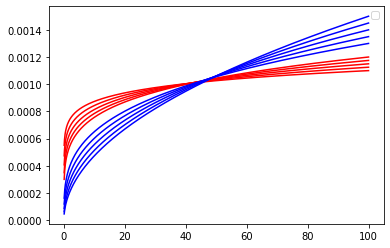

In [16]:
def rotvel_alpha(rs, alpha=0.):
    vel = np.power(rs, alpha)
    sm = np.sum(vel)
    return vel/sm

rs = np.linspace(0.1, 100, 1000)
for al in np.linspace(0.1, 0.2, 5):
    v1 = rotvel_alpha(rs, alpha=al)
    plt.plot(rs, v1, '-', color='r')
for al in np.linspace(0.3, 0.5, 5):
    v1 = rotvel_alpha(rs, alpha=al)
    plt.plot(rs, v1, '-', color='b')
plt.legend()

/mnt/sdb2/upwork/anton/catalyst-venv/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in power
  


alpha, vmax, r0:: [3.40822845e-01 3.78162809e+00 7.68526466e-04]
[ 0.37128007 41.57928379]
[ 0.33571956 47.58452175]


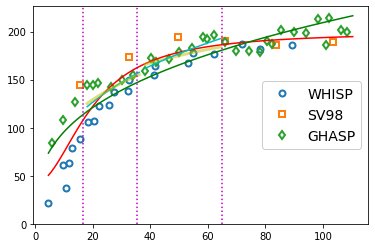

In [17]:
from scipy.optimize import curve_fit
from scipy.interpolate import CubicSpline
import scipy.interpolate as interpolate


def simple_velocity_approx(x, a, b, c):
    return a * x**2/(b**2+x**2)+c

def rotvel_alpha(x, alpha, vmax):
    vel = np.power(x, alpha)
    return vmax*vel

def rotvel_alpha_scaled(x, alpha, vmax, r0):
    vel = np.power(x/r0, alpha)
    return vmax*vel


VER_REL_ERR=0.07
    
rot_approx = {}

for ind, name_ in enumerate(['NGC3893']):
    ax = plt.gca()
    comb_rot = None
    fnames = rot_data[name_]
    label_i = 0
    for xx,yy,label in fnames:
        ax.plot(xx, yy, ['o', 's', 'd'][label_i], label=label, markerfacecolor="None", markeredgewidth=2)
        
        if comb_rot is None:
            comb_rot = np.array([xx, yy]).T
        else:
            comb_rot = np.concatenate([comb_rot, np.array([xx, yy]).T])
        
        label_i += 1
    
#     if name_ == 'NGC5371':
#         comb_rot = np.concatenate([comb_rot, np.array([[0], [0]]).T])
    
    comb_rot = comb_rot[comb_rot[:, 0].argsort()]
    
    try:
        param, param_cov = curve_fit(simple_velocity_approx, comb_rot[:,0], comb_rot[:,1])
        points = np.linspace(min(comb_rot[:,0]), max(comb_rot[:,0])+2, 100)
        ax.plot(points, simple_velocity_approx(points, param[0], param[1], param[2]), color='r')
        
        
        
        param, param_cov = curve_fit(rotvel_alpha_scaled, comb_rot[:,0], comb_rot[:,1])
        ax.plot(points, rotvel_alpha_scaled(points, param[0], param[1], param[2]), color='g')
        print('alpha, vmax, r0::', param)
        
        
#         vo=simple_velocity_approx(points, param[0], param[1], param[2])
#         ax.fill_between(points, vo*(1-VER_REL_ERR), vo*(1+VER_REL_ERR), color='r', alpha=0.3)
        
        rot_approx[name_] = [points,param]
        
        mask = (comb_rot[:,0] > 16.8) & (comb_rot[:,0] < 35.5)
        param, param_cov = curve_fit(rotvel_alpha, comb_rot[mask,0], comb_rot[mask,1])
        points = np.linspace(min(comb_rot[mask, 0]), max(comb_rot[mask, 0])+2, 100)
        ax.plot(points, rotvel_alpha(points, param[0], param[1]), color='c')
        print(param)     
        
        ax.plot(points, rotvel_alpha(points, 0.31, 51), color='y', lw=3, alpha=0.5)
        mask = (comb_rot[:,0] > 35.5) & (comb_rot[:,0] < 65)
        points = np.linspace(min(comb_rot[mask, 0]), max(comb_rot[mask, 0])+2, 100)
        ax.plot(points, rotvel_alpha(points, 0.2, 80), color='y', lw=3, alpha=0.5)
        
        mask = (comb_rot[:,0] > 35.5) & (comb_rot[:,0] < 65)
        param, param_cov = curve_fit(rotvel_alpha, comb_rot[mask,0], comb_rot[mask,1])
        points = np.linspace(min(comb_rot[mask, 0]), max(comb_rot[mask, 0])+2, 100)
        ax.plot(points, rotvel_alpha(points, param[0], param[1]), color='c')
        print(param)
        
    except Exception as e:
        print(e)
    
    
    ax.legend(loc='right', fontsize=14, facecolor='white', framealpha=1)
    ax.set_ylim(0)
    ax.axvline(x=16.8, ls=':', color='m')
    ax.axvline(x=35.5, ls=':', color='m')
    ax.axvline(x=65.0, ls=':', color='m')

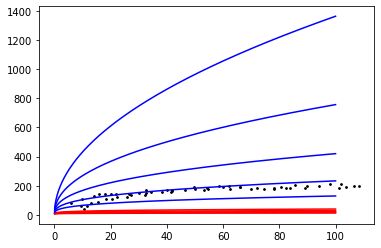

In [18]:
rs = np.linspace(0.1, 100, 1000)
for al in np.linspace(0.1, 0.2, 5):
    v1 = rotvel_alpha_scaled(rs, al, 3.78, 7.68526466e-04)
    plt.plot(rs, v1, '-', color='r')
for al in np.linspace(0.3, 0.5, 5):
    v1 = rotvel_alpha_scaled(rs, al, 3.78, 7.68526466e-04)
    plt.plot(rs, v1, '-', color='b')
plt.scatter(comb_rot[:,0], comb_rot[:,1], 3, color='k')

No handles with labels found to put in legend.


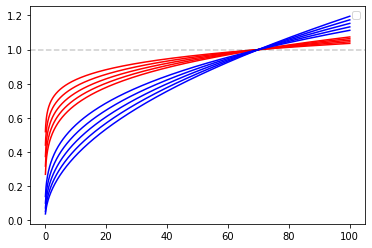

In [19]:
rs = np.linspace(0.1, 100, 1000)
for al in np.linspace(0.1, 0.2, 5):
    v1 = rotvel_alpha_scaled(rs, al, 1, 70)
    plt.plot(rs, v1, '-', color='r')
for al in np.linspace(0.3, 0.5, 5):
    v1 = rotvel_alpha_scaled(rs, al, 1, 70)
    plt.plot(rs, v1, '-', color='b')
plt.axhline(y=1., color='k', alpha=0.2, ls='--')
plt.legend()

No handles with labels found to put in legend.


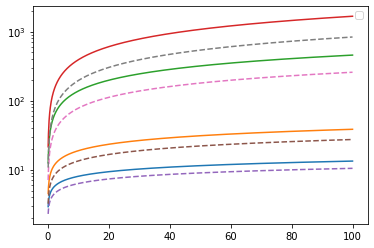

In [20]:
rs = np.linspace(0.1, 100, 1000)
for al in [0.22, 0.31, 0.52, 0.63]:
    v1 = rotvel_alpha_scaled(rs, al, 1, 7.68526466e-04)
    plt.plot(rs, v1, '-')

for al in [0.22, 0.31, 0.52, 0.63]:
    v1 = rotvel_alpha_scaled(rs, al, 1, 3*7.68526466e-04)
    plt.plot(rs, v1, '--')
    
plt.yscale('log')
plt.legend()

In [22]:
consist_ = {
'NGC 2403' : [(195.4, 241.4), (290, 309), (371, 415)],
'NGC 3893' : [(12.5 , 21.2), (32.0, 39.1), (59.5,70.5)],
'NGC 5676' : [(17.5 , 24.4), (33.5, 41.5), (60.5, 76.5)],
}

for k in consist_:
    v = consist_[k]
    print(k)
    print(v[1][0]/v[0][1], v[2][0]/v[1][1])

NGC 2403
1.2013256006628004 1.2006472491909386
NGC 3893
1.509433962264151 1.5217391304347825
NGC 5676
1.3729508196721312 1.4578313253012047


strange, close values

In [23]:
def resonance_alpha(alpha, m=0):
    rat = 1+sqrt(2)*sqrt(1+alpha)/m
    return np.power(rat, 1/(1-alpha))

In [24]:
resonance_alpha(0.22, m=-2), resonance_alpha(0.22, m=2)

(0.14267636966243544, 2.09590601862782)

In [25]:
resonance_alpha(0.31, m=-2), resonance_alpha(0.31, m=2)

(0.09056526366457622, 2.361625044311334)

In [26]:
resonance_alpha(0.52, m=-2), resonance_alpha(0.52, m=2)

(0.013854026598673345, 3.6914535083931206)

In [27]:
resonance_alpha(0.63, m=-2), resonance_alpha(0.63, m=2)

(0.0018377345999874286, 5.6898426669676425)

In [28]:
(12.5 + 21.2)/2, (32.0 + 39.1)/2

(16.85, 35.55)

Re-check:

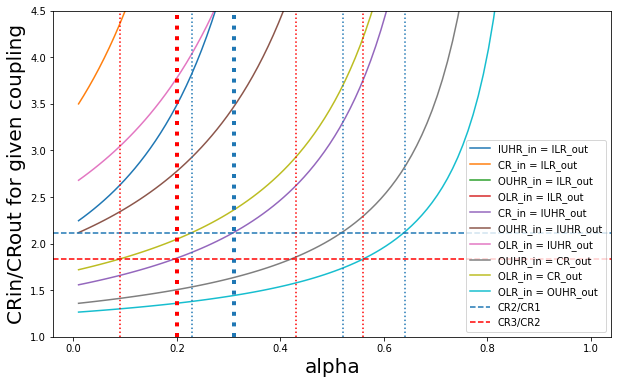

In [29]:
def resonances_ratio_with_alpha(alpha=None, m_in=None, m_out=None):
    rat = (m_out/m_in * (m_in+sqrt(2*(1+alpha))) / (m_out+sqrt(2*(1+alpha))) )
    return np.power(rat, 1/(1-alpha))

als = np.linspace(0.01, 0.99, 100)

upomega_1 = 2.11
upomega_2 = 1.83

fig = plt.figure(figsize=[10, 6])
for ind_out,m_out in enumerate([-2, -4, 100000, 4, 2]):
    for ind_in,m_in in enumerate([-2, -4, 100000, 4, 2]):
        if ind_in<=ind_out:
            continue
            
        res = [resonances_ratio_with_alpha(alpha=al, m_in=m_in, m_out=m_out) for al in als]
        plt.plot(als, res, '-', label=f'{resonance_names[ind_in]}_in = {resonance_names[ind_out]}_out')


plt.ylim(1.,4.5)
plt.axhline(y=upomega_1, ls='--', label='CR2/CR1')
plt.axvline(x=0.31, ls=':', lw=4)
plt.axvline(x=0.52, ls=':')
plt.axvline(x=0.64, ls=':')
plt.axvline(x=0.23, ls=':')

plt.axhline(y=upomega_2, ls='--', c='r', label='CR3/CR2')
plt.axvline(x=0.2, ls=':', c='r', lw=4)
plt.axvline(x=0.09, ls=':', c= 'r')
plt.axvline(x=0.43, ls=':', c= 'r')
plt.axvline(x=0.56, ls=':', c= 'r')


# plt.axhline(y=1.71, ls='--', c='g', label='NGC628')

plt.xlabel('alpha', fontsize=20)
plt.ylabel('CRin/CRout for given coupling', fontsize=20)
plt.legend()
plt.show()

alpha=0.1, vmax, r0:: [5.83895479e+00 1.81520240e-13]
alpha=0.2, vmax, r0:: [3.42634653e+00 1.91608433e-07]
alpha=0.3, vmax, r0:: [152.07154195  37.55740529]
alpha=0.4, vmax, r0:: [155.81996998  43.96978027]
alpha=0.5, vmax, r0:: [2.94449387 0.01679531]
alpha=0.6, vmax, r0:: [3.93161228 0.10837706]
alpha=0.7, vmax, r0:: [2.57027778 0.14955983]
alpha=0.8, vmax, r0:: [2.50879756 0.31667155]
alpha=0.9, vmax, r0:: [1.7673594  0.39724058]


/mnt/sdb2/upwork/anton/catalyst-venv/lib/python3.6/site-packages/ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in power
/mnt/sdb2/upwork/anton/catalyst-venv/lib/python3.6/site-packages/ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in power
/mnt/sdb2/upwork/anton/catalyst-venv/lib/python3.6/site-packages/ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in power
/mnt/sdb2/upwork/anton/catalyst-venv/lib/python3.6/site-packages/ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in power
/mnt/sdb2/upwork/anton/catalyst-venv/lib/python3.6/site-packages/ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in power
/mnt/sdb2/upwork/anton/catalyst-venv/lib/python3.6/site-packages/scipy/optimize/minpack.py:787: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/mnt/sdb2/upwork/anton/catalyst-venv/lib/python3.6/site-packages/ipykernel_launcher.py:57: Runtim

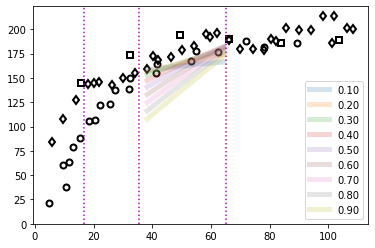

In [30]:
from scipy.optimize import curve_fit
from scipy.interpolate import CubicSpline
import scipy.interpolate as interpolate


def simple_velocity_approx(x, a, b, c):
    return a * x**2/(b**2+x**2)+c

def rotvel_alpha(x, alpha, vmax):
    vel = np.power(x, alpha)
    return vmax*vel

def rotvel_alpha_scaled(x, alpha, vmax, r0):
    vel = np.power(x/r0, alpha)
    return vmax*vel

def rotvel_alpha_scaled_(x, alpha, vmax):
    vel = np.power(x/1000, alpha)
    return vmax*vel

VER_REL_ERR=0.07
    
rot_approx = {}

for ind, name_ in enumerate(['NGC3893']):
    ax = plt.gca()
    comb_rot = None
    fnames = rot_data[name_]
    label_i = 0
    for xx,yy,label in fnames:
        ax.plot(xx, yy, ['o', 's', 'd'][label_i], markerfacecolor="None", markeredgewidth=2, color='k')
        
        if comb_rot is None:
            comb_rot = np.array([xx, yy]).T
        else:
            comb_rot = np.concatenate([comb_rot, np.array([xx, yy]).T])
        
        label_i += 1
    
    comb_rot = comb_rot[comb_rot[:, 0].argsort()]
    
    try:             
        
#         param, param_cov = curve_fit(rotvel_alpha_scaled, comb_rot[:,0], comb_rot[:,1])
#         ax.plot(points, rotvel_alpha_scaled(points, param[0], param[1], param[2]), color='g')
#         print('alpha, vmax, r0::', param)
        
# #         param, param_cov = curve_fit(lambda l: rotvel_alpha_scaled(*l, 10.), comb_rot[:,0], comb_rot[:,1])
#         param, param_cov = curve_fit(rotvel_alpha_scaled_, comb_rot[:,0], comb_rot[:,1])
#         ax.plot(points, rotvel_alpha_scaled_(points, param[0], param[1]), color='r', alpha=0.2, lw=5)
#         print('alpha, vmax, r0=1000::', param)
        
        for alp in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
            
            def rotvel_alpha_fixed(x, vmax, r0):
                global alp
                vel = np.power(x/r0, alp)
                return vmax*vel
            
            param, param_cov = curve_fit(rotvel_alpha_fixed, comb_rot[:,0], comb_rot[:,1])
            ax.plot(points, rotvel_alpha_fixed(points, param[0], param[1]), alpha=0.2, lw=5, label=f'{alp:2.2f}')
            print(f'alpha={alp}, vmax, r0::', param)
        
    except Exception as e:
        print(e)
    
    
#     ax.legend(loc='right', fontsize=14, facecolor='white', framealpha=1)
ax.set_ylim(0)
ax.axvline(x=16.8, ls=':', color='m')
ax.axvline(x=35.5, ls=':', color='m')
ax.axvline(x=65.0, ls=':', color='m')
plt.legend()

alpha=0.22, vmax, r0:: [2.74144664e+00 4.01780619e-07]
alpha=0.37, vmax, r0:: [179.22633895  62.79297293]
alpha=0.54, vmax, r0:: [201.09340208  77.32119039]


/mnt/sdb2/upwork/anton/catalyst-venv/lib/python3.6/site-packages/ipykernel_launcher.py:70: RuntimeWarning: invalid value encountered in power
/mnt/sdb2/upwork/anton/catalyst-venv/lib/python3.6/site-packages/ipykernel_launcher.py:70: RuntimeWarning: invalid value encountered in power


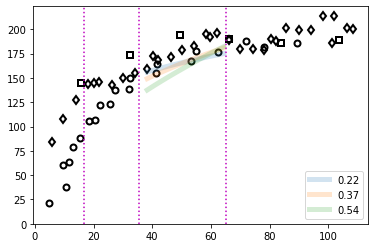

In [31]:
from scipy.optimize import curve_fit
from scipy.interpolate import CubicSpline
import scipy.interpolate as interpolate


def simple_velocity_approx(x, a, b, c):
    return a * x**2/(b**2+x**2)+c

def rotvel_alpha(x, alpha, vmax):
    vel = np.power(x, alpha)
    return vmax*vel

def rotvel_alpha_scaled(x, alpha, vmax, r0):
    vel = np.power(x/r0, alpha)
    return vmax*vel

def rotvel_alpha_scaled_(x, alpha, vmax):
    vel = np.power(x/1000, alpha)
    return vmax*vel

VER_REL_ERR=0.07
    
rot_approx = {}

for ind, name_ in enumerate(['NGC3893']):
    ax = plt.gca()
    comb_rot = None
    fnames = rot_data[name_]
    label_i = 0
    for xx,yy,label in fnames:
        ax.plot(xx, yy, ['o', 's', 'd'][label_i], markerfacecolor="None", markeredgewidth=2, color='k')
        
        if comb_rot is None:
            comb_rot = np.array([xx, yy]).T
        else:
            comb_rot = np.concatenate([comb_rot, np.array([xx, yy]).T])
        
        label_i += 1
    
    comb_rot = comb_rot[comb_rot[:, 0].argsort()]
    
    try:             
        
#         param, param_cov = curve_fit(rotvel_alpha_scaled, comb_rot[:,0], comb_rot[:,1])
#         ax.plot(points, rotvel_alpha_scaled(points, param[0], param[1], param[2]), color='g')
#         print('alpha, vmax, r0::', param)
        
# #         param, param_cov = curve_fit(lambda l: rotvel_alpha_scaled(*l, 10.), comb_rot[:,0], comb_rot[:,1])
#         param, param_cov = curve_fit(rotvel_alpha_scaled_, comb_rot[:,0], comb_rot[:,1])
#         ax.plot(points, rotvel_alpha_scaled_(points, param[0], param[1]), color='r', alpha=0.2, lw=5)
#         print('alpha, vmax, r0=1000::', param)

# plt.axvline(x=0.31, ls=':', lw=4)
# plt.axvline(x=0.52, ls=':')
# plt.axvline(x=0.64, ls=':')
# plt.axvline(x=0.23, ls=':')

# plt.axhline(y=upomega_2, ls='--', c='r', label='CR3/CR2')
# plt.axvline(x=0.2, ls=':', c='r', lw=4)
# plt.axvline(x=0.09, ls=':', c= 'r')
# plt.axvline(x=0.43, ls=':', c= 'r')
# plt.axvline(x=0.56, ls=':', c= 'r')
        
#         for alp in [0.23, 0.31, 0.52, 0.64]:
#         for alp in [0.09, 0.2, 0.43, 0.56]:
        for alp in [0.22, 0.37, 0.54]:
            
            def rotvel_alpha_fixed(x, vmax, r0):
                global alp
                vel = np.power(x/r0, alp)
                return vmax*vel
            
            param, param_cov = curve_fit(rotvel_alpha_fixed, comb_rot[:,0], comb_rot[:,1])
            ax.plot(points, rotvel_alpha_fixed(points, param[0], param[1]), alpha=0.2, lw=5, label=f'{alp:2.2f}')
            print(f'alpha={alp}, vmax, r0::', param)
        
    except Exception as e:
        print(e)
    
    
#     ax.legend(loc='right', fontsize=14, facecolor='white', framealpha=1)
ax.set_ylim(0)
ax.axvline(x=16.8, ls=':', color='m')
ax.axvline(x=35.5, ls=':', color='m')
ax.axvline(x=65.0, ls=':', color='m')
plt.legend()

From ILR to OLR:

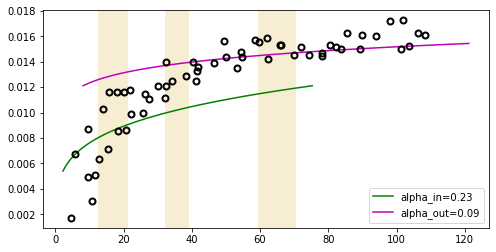

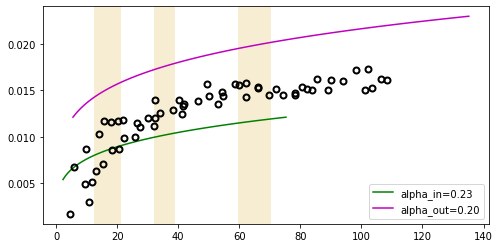

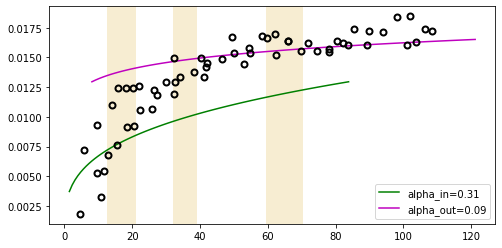

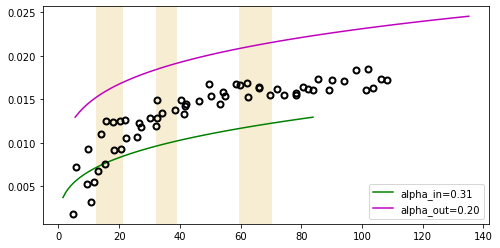

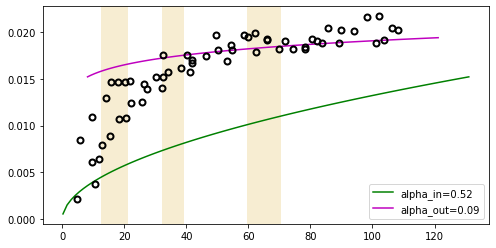

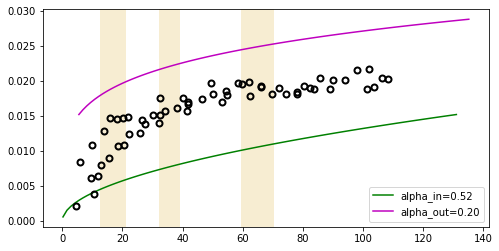

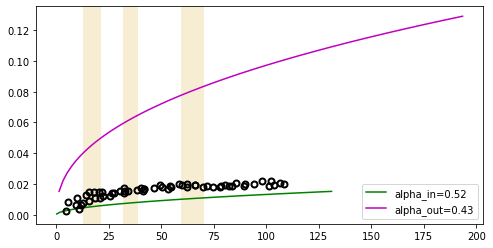

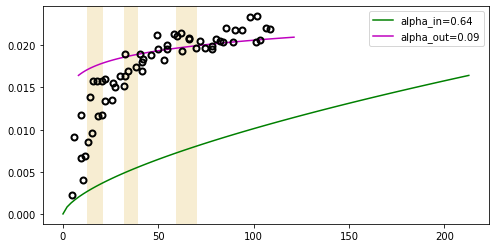

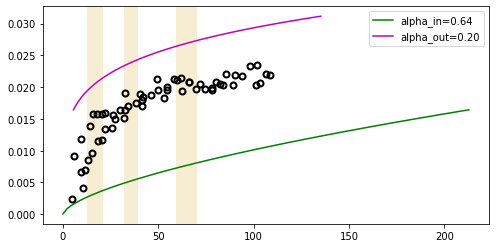

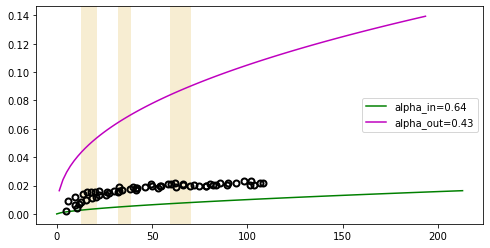

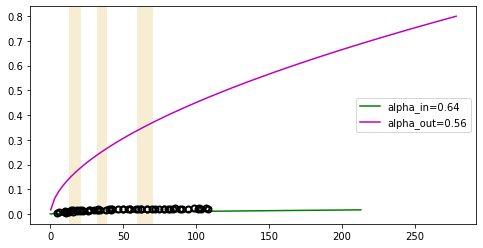

In [32]:
def rotvel_alpha_unityarea(rs, alpha=0.):
    vel = np.power(rs, alpha)
    sm = np.sum(vel)
    return vel/sm

crrrs = [(12.5 , 21.2), (32.0, 39.1), (59.5,70.5)]
cr1 = 16.5
cr2 = 35.5
cr3 = 66.0

for alp_in in [0.23, 0.31, 0.52, 0.64]:
    for alp_out in [0.09, 0.2, 0.43, 0.56]:
        if alp_out > alp_in:
            continue
        
        ilr_in1 = resonance_alpha(alp_in, m=-2)*cr1
        olr_out1 = resonance_alpha(alp_in, m=2)*cr2
        
        ilr_in2 = resonance_alpha(alp_out, m=-2)*cr2
        olr_out2 = resonance_alpha(alp_out, m=2)*cr3
        
        fig = plt.figure(figsize=[8,4])
        
        pts1 = np.linspace(ilr_in1, olr_out1, 100)
        vel1 = rotvel_alpha_unityarea(pts1, alpha=alp_in)
        plt.plot(pts1, vel1, '-', color='g', label=f'alpha_in={alp_in:2.2f}')
        
        pts2 = np.linspace(ilr_in2, olr_out2, 100)
        vel2 = rotvel_alpha_unityarea(pts2, alpha=alp_out)
        coeff = vel1[-1]/vel2[0]
        plt.plot(pts2, vel2*coeff, '-', color='m', label=f'alpha_out={alp_out:2.2f}')
        
        for cr_l,cr_r in crrrs:
            plt.axvspan(cr_r, cr_l, facecolor='goldenrod', alpha=0.2)
            
        cf2 = vel1[-1]/150.
        for ind, name_ in enumerate(['NGC3893']):
            ax = plt.gca()
            comb_rot = None
            fnames = rot_data[name_]
            label_i = 0
            for xx,yy,label in fnames:
                ax.plot(xx, yy*cf2, ['o', 's', 'd'][label_i], markerfacecolor="None", markeredgewidth=2, color='k')
        
        plt.legend()
        plt.show()

From ILR1 to OLR3 + match in the middle:

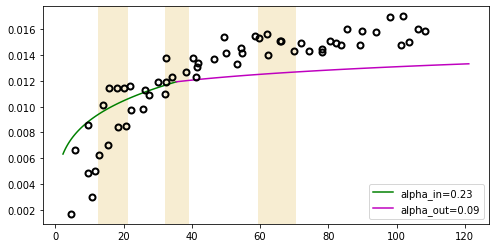

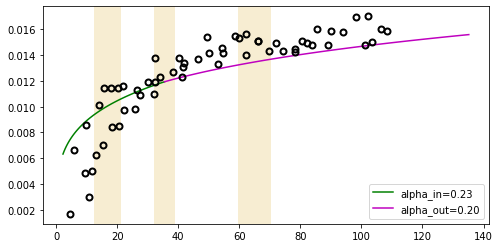

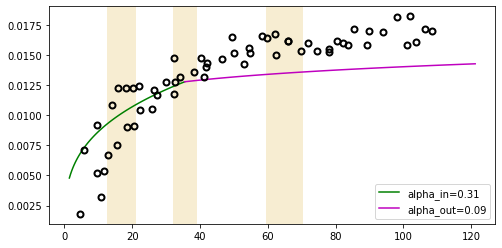

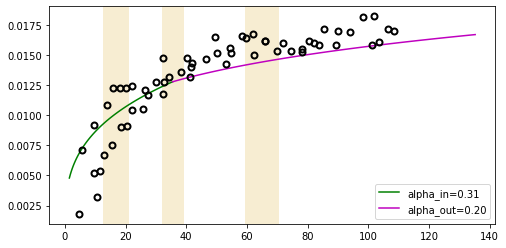

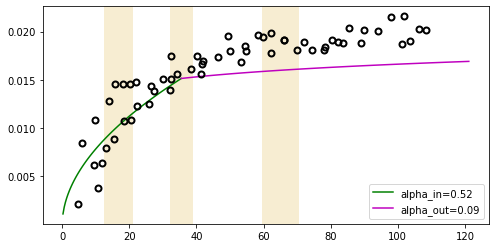

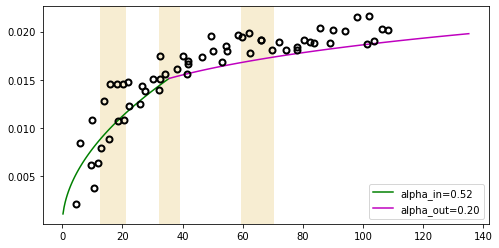

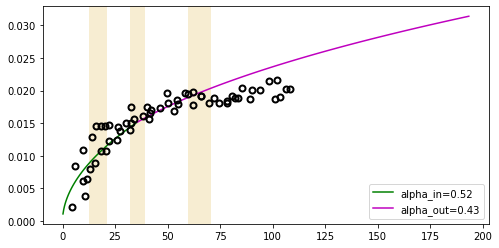

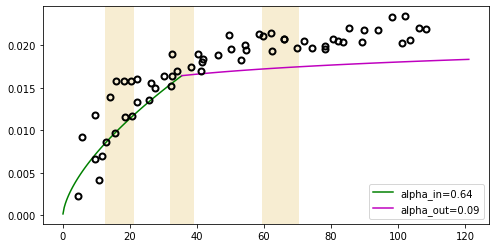

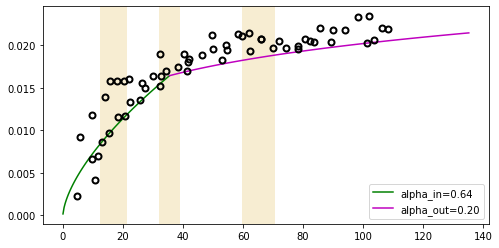

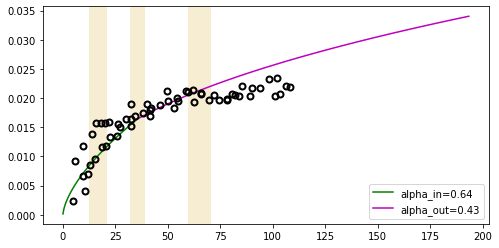

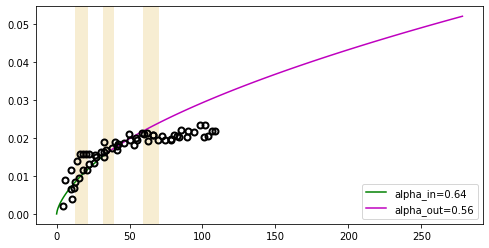

In [33]:
def rotvel_alpha_unityarea(rs, alpha=0.):
    vel = np.power(rs, alpha)
    sm = np.sum(vel)
    return vel/sm

crrrs = [(12.5 , 21.2), (32.0, 39.1), (59.5,70.5)]
cr1 = 16.5
cr2 = 35.5
cr3 = 66.0

for alp_in in [0.23, 0.31, 0.52, 0.64]:
    for alp_out in [0.09, 0.2, 0.43, 0.56]:
        if alp_out > alp_in:
            continue
        
        ilr_in1 = resonance_alpha(alp_in, m=-2)*cr1
        olr_out1 = cr2
        
        ilr_in2 = cr2
        olr_out2 = resonance_alpha(alp_out, m=2)*cr3
        
        fig = plt.figure(figsize=[8,4])
        
        pts1 = np.linspace(ilr_in1, olr_out1, 100)
        vel1 = rotvel_alpha_unityarea(pts1, alpha=alp_in)
        plt.plot(pts1, vel1, '-', color='g', label=f'alpha_in={alp_in:2.2f}')
        
        pts2 = np.linspace(ilr_in2, olr_out2, 100)
        vel2 = rotvel_alpha_unityarea(pts2, alpha=alp_out)
        coeff = vel1[-1]/vel2[0]
        plt.plot(pts2, vel2*coeff, '-', color='m', label=f'alpha_out={alp_out:2.2f}')
        
        for cr_l,cr_r in crrrs:
            plt.axvspan(cr_r, cr_l, facecolor='goldenrod', alpha=0.2)
            
        cf2 = vel1[-1]/150.
        for ind, name_ in enumerate(['NGC3893']):
            ax = plt.gca()
            comb_rot = None
            fnames = rot_data[name_]
            label_i = 0
            for xx,yy,label in fnames:
                ax.plot(xx, yy*cf2, ['o', 's', 'd'][label_i], markerfacecolor="None", markeredgewidth=2, color='k')
        
        plt.legend()
        plt.show()

From CR till CR + match:

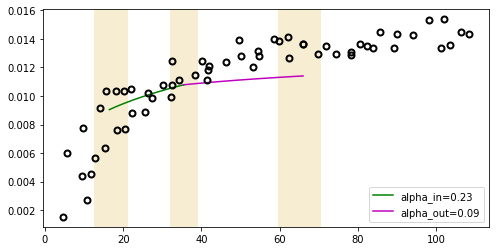

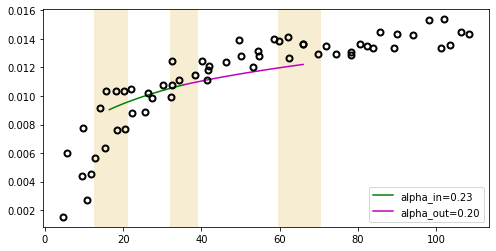

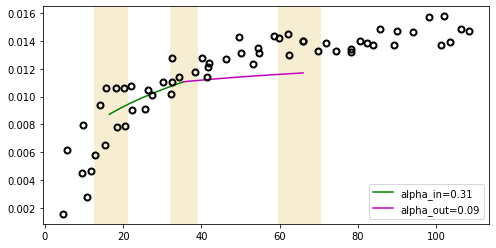

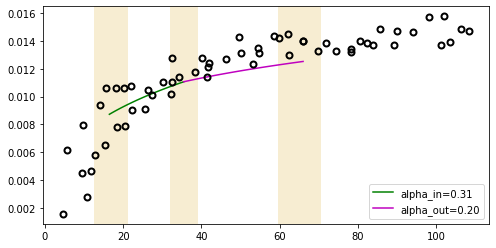

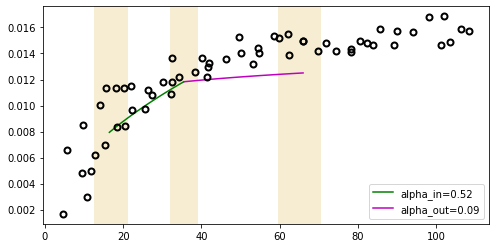

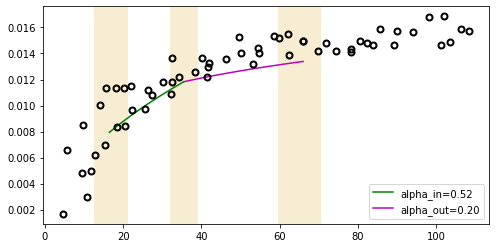

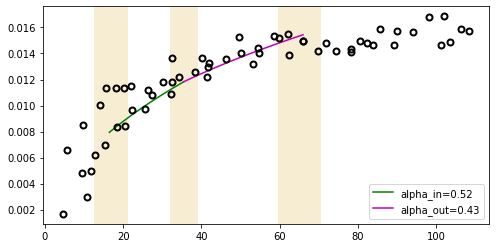

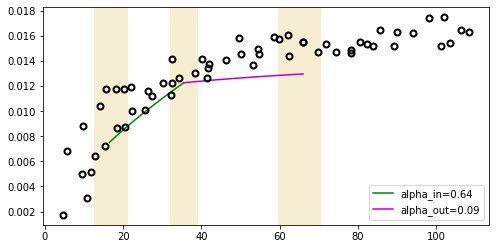

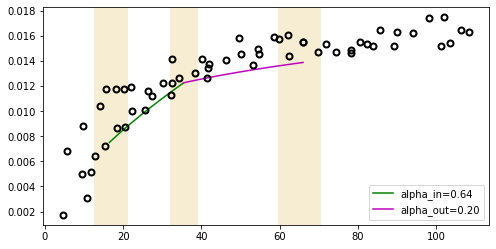

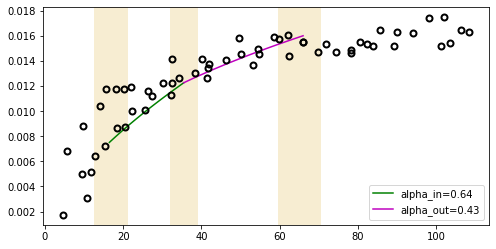

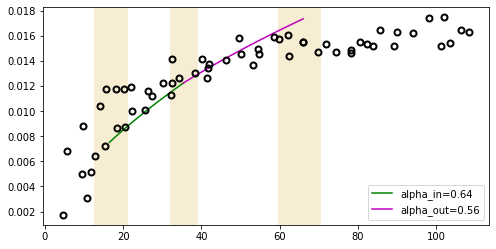

In [34]:
def rotvel_alpha_unityarea(rs, alpha=0.):
    vel = np.power(rs, alpha)
    sm = np.sum(vel)
    return vel/sm

crrrs = [(12.5 , 21.2), (32.0, 39.1), (59.5,70.5)]
cr1 = 16.5
cr2 = 35.5
cr3 = 66.0

for alp_in in [0.23, 0.31, 0.52, 0.64]:
    for alp_out in [0.09, 0.2, 0.43, 0.56]:
        if alp_out > alp_in:
            continue
        
        ilr_in1 = cr1
        olr_out1 = cr2
        
        ilr_in2 = cr2
        olr_out2 = cr3
        
        fig = plt.figure(figsize=[8,4])
        
        pts1 = np.linspace(ilr_in1, olr_out1, 100)
        vel1 = rotvel_alpha_unityarea(pts1, alpha=alp_in)
        plt.plot(pts1, vel1, '-', color='g', label=f'alpha_in={alp_in:2.2f}')
        
        pts2 = np.linspace(ilr_in2, olr_out2, 100)
        vel2 = rotvel_alpha_unityarea(pts2, alpha=alp_out)
        coeff = vel1[-1]/vel2[0]
        plt.plot(pts2, vel2*coeff, '-', color='m', label=f'alpha_out={alp_out:2.2f}')
        
        for cr_l,cr_r in crrrs:
            plt.axvspan(cr_r, cr_l, facecolor='goldenrod', alpha=0.2)
            
        cf2 = vel1[-1]/150.
        for ind, name_ in enumerate(['NGC3893']):
            ax = plt.gca()
            comb_rot = None
            fnames = rot_data[name_]
            label_i = 0
            for xx,yy,label in fnames:
                ax.plot(xx, yy*cf2, ['o', 's', 'd'][label_i], markerfacecolor="None", markeredgewidth=2, color='k')
        
        plt.legend()
        plt.show()

Actual?

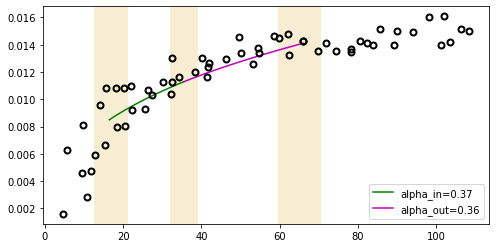

In [35]:
def rotvel_alpha_unityarea(rs, alpha=0.):
    vel = np.power(rs, alpha)
    sm = np.sum(vel)
    return vel/sm

crrrs = [(12.5 , 21.2), (32.0, 39.1), (59.5,70.5)]
cr1 = 16.5
cr2 = 35.5
cr3 = 66.0

for alp_in in [0.37]:
    for alp_out in [0.36]:
        if alp_out > alp_in:
            continue
        
        ilr_in1 = cr1
        olr_out1 = cr2
        
        ilr_in2 = cr2
        olr_out2 = cr3
        
        fig = plt.figure(figsize=[8,4])
        
        pts1 = np.linspace(ilr_in1, olr_out1, 100)
        vel1 = rotvel_alpha_unityarea(pts1, alpha=alp_in)
        plt.plot(pts1, vel1, '-', color='g', label=f'alpha_in={alp_in:2.2f}')
        
        pts2 = np.linspace(ilr_in2, olr_out2, 100)
        vel2 = rotvel_alpha_unityarea(pts2, alpha=alp_out)
        coeff = vel1[-1]/vel2[0]
        plt.plot(pts2, vel2*coeff, '-', color='m', label=f'alpha_out={alp_out:2.2f}')
        
        for cr_l,cr_r in crrrs:
            plt.axvspan(cr_r, cr_l, facecolor='goldenrod', alpha=0.2)
            
        cf2 = vel1[-1]/150.
        for ind, name_ in enumerate(['NGC3893']):
            ax = plt.gca()
            comb_rot = None
            fnames = rot_data[name_]
            label_i = 0
            for xx,yy,label in fnames:
                ax.plot(xx, yy*cf2, ['o', 's', 'd'][label_i], markerfacecolor="None", markeredgewidth=2, color='k')
        
        plt.legend()
        plt.show()

Assuming r0 = 2.2h and V0 from T-F:

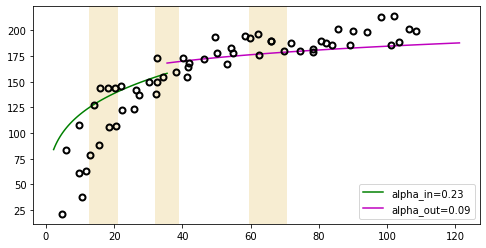

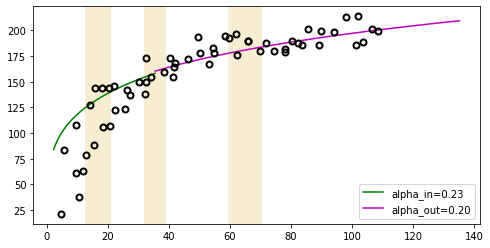

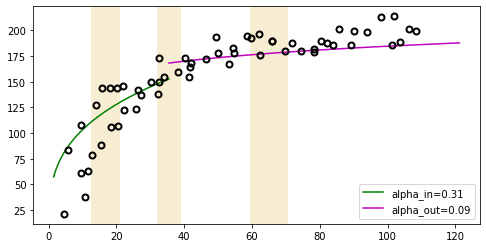

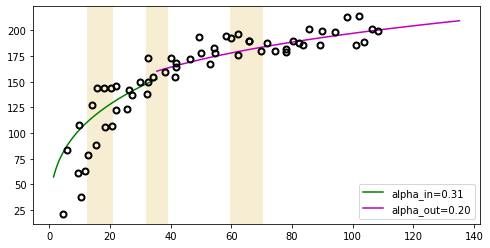

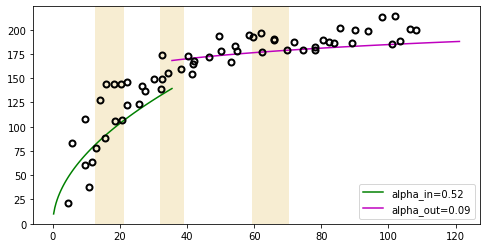

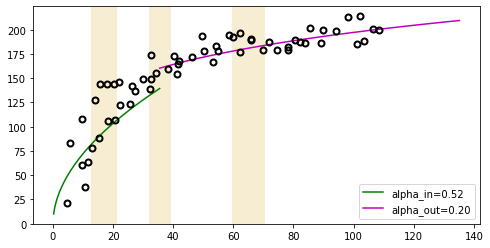

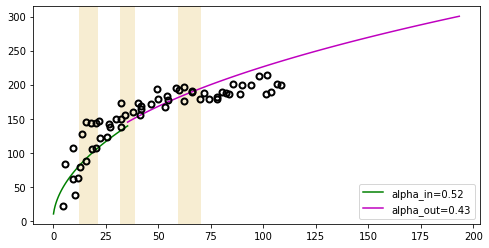

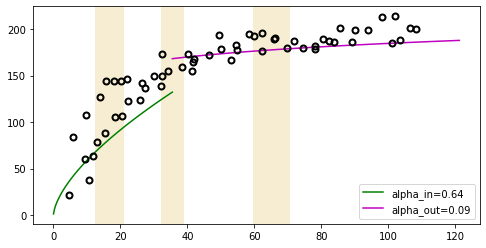

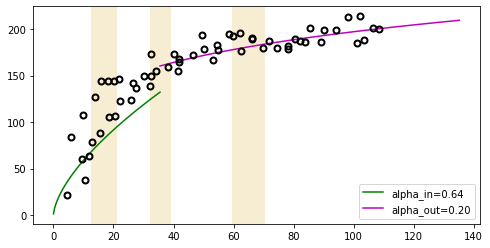

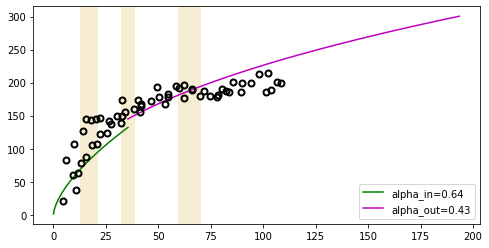

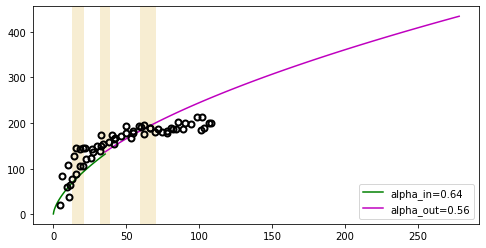

In [45]:
def rotvel_alpha_unityarea(rs, alpha=0., h=25.):
    vel = 175*np.power(rs/(2.2*h), alpha)
    return vel

crrrs = [(12.5 , 21.2), (32.0, 39.1), (59.5,70.5)]
cr1 = 16.5
cr2 = 35.5
cr3 = 66.0

for alp_in in [0.23, 0.31, 0.52, 0.64]:
    for alp_out in [0.09, 0.2, 0.43, 0.56]:
        if alp_out > alp_in:
            continue
        
        ilr_in1 = resonance_alpha(alp_in, m=-2)*cr1
        olr_out1 = cr2
        
        ilr_in2 = cr2
        olr_out2 = resonance_alpha(alp_out, m=2)*cr3
        
        fig = plt.figure(figsize=[8,4])
        
        pts1 = np.linspace(ilr_in1, olr_out1, 100)
        vel1 = rotvel_alpha_unityarea(pts1, alpha=alp_in)
        plt.plot(pts1, vel1, '-', color='g', label=f'alpha_in={alp_in:2.2f}')
        
        pts2 = np.linspace(ilr_in2, olr_out2, 100)
        vel2 = rotvel_alpha_unityarea(pts2, alpha=alp_out)
#         coeff = vel1[-1]/vel2[0]
        coeff = 1.
        plt.plot(pts2, vel2*coeff, '-', color='m', label=f'alpha_out={alp_out:2.2f}')
        
        for cr_l,cr_r in crrrs:
            plt.axvspan(cr_r, cr_l, facecolor='goldenrod', alpha=0.2)
            
#         cf2 = vel1[-1]/150.
        cf2 = 1.
        for ind, name_ in enumerate(['NGC3893']):
            ax = plt.gca()
            comb_rot = None
            fnames = rot_data[name_]
            label_i = 0
            for xx,yy,label in fnames:
                ax.plot(xx, yy*cf2, ['o', 's', 'd'][label_i], markerfacecolor="None", markeredgewidth=2, color='k')
        
        plt.legend()
        plt.show()

# Shear

Shear is $\Gamma = 0.5\times(1-R/V\times\frac{dV}{dR})$

Links about connection:

- Seigar 2005 https://articles.adsabs.harvard.edu/pdf/2005MNRAS.359.1065S
- Seigar 2006 https://iopscience.iop.org/article/10.1086/504463/pdf
- Michikoshi 2014 https://arxiv.org/pdf/1404.6332 (they compare different approximations)

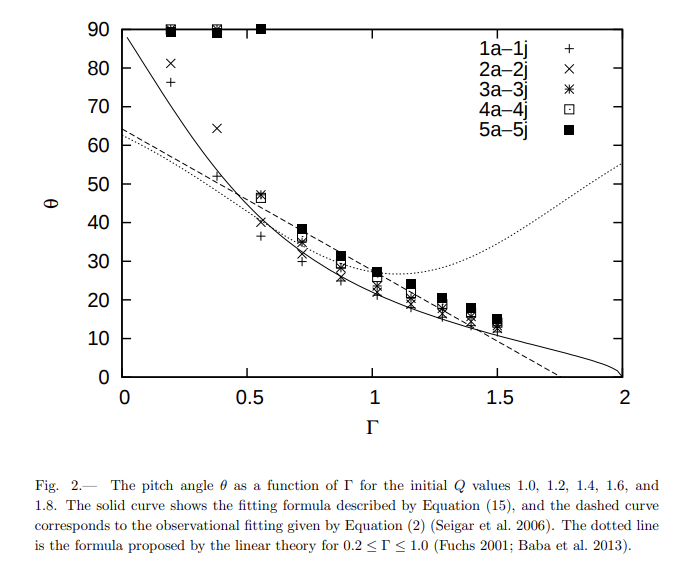

In [114]:
Image('/home/amarch/Pictures/Screenshot from 2025-03-06 19-36-32.png', width=600)

[ 0.37128007 41.57928379]
[ 0.33571956 47.58452175]


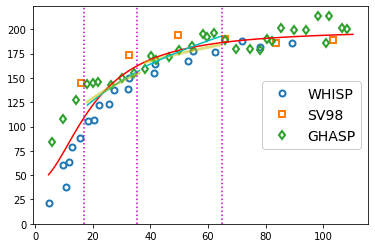

In [15]:
from scipy.optimize import curve_fit
from scipy.interpolate import CubicSpline
import scipy.interpolate as interpolate


def simple_velocity_approx(x, a, b, c):
    return a * x**2/(b**2+x**2)+c

def rotvel_alpha(x, alpha, vmax):
    vel = np.power(x, alpha)
    return vmax*vel


VER_REL_ERR=0.07
    
rot_approx = {}

for ind, name_ in enumerate(['NGC3893']):
    ax = plt.gca()
    comb_rot = None
    fnames = rot_data[name_]
    label_i = 0
    for xx,yy,label in fnames:
        ax.plot(xx, yy, ['o', 's', 'd'][label_i], label=label, markerfacecolor="None", markeredgewidth=2)
        
        if comb_rot is None:
            comb_rot = np.array([xx, yy]).T
        else:
            comb_rot = np.concatenate([comb_rot, np.array([xx, yy]).T])
        
        label_i += 1
    
#     if name_ == 'NGC5371':
#         comb_rot = np.concatenate([comb_rot, np.array([[0], [0]]).T])
    
    comb_rot = comb_rot[comb_rot[:, 0].argsort()]
    
    try:
        param, param_cov = curve_fit(simple_velocity_approx, comb_rot[:,0], comb_rot[:,1])
        
        points = np.linspace(min(comb_rot[:,0]), max(comb_rot[:,0])+2, 100)
        ax.plot(points, simple_velocity_approx(points, param[0], param[1], param[2]), color='r')
        
#         vo=simple_velocity_approx(points, param[0], param[1], param[2])
#         ax.fill_between(points, vo*(1-VER_REL_ERR), vo*(1+VER_REL_ERR), color='r', alpha=0.3)
        
        rot_approx[name_] = [points,param]
        
        mask = (comb_rot[:,0] > 16.8) & (comb_rot[:,0] < 35.5)
        param, param_cov = curve_fit(rotvel_alpha, comb_rot[mask,0], comb_rot[mask,1])
        points = np.linspace(min(comb_rot[mask, 0]), max(comb_rot[mask, 0])+2, 100)
        ax.plot(points, rotvel_alpha(points, param[0], param[1]), color='c')
        print(param)     
        
        ax.plot(points, rotvel_alpha(points, 0.31, 51), color='y', lw=3, alpha=0.5)
        mask = (comb_rot[:,0] > 35.5) & (comb_rot[:,0] < 65)
        points = np.linspace(min(comb_rot[mask, 0]), max(comb_rot[mask, 0])+2, 100)
        ax.plot(points, rotvel_alpha(points, 0.2, 80), color='y', lw=3, alpha=0.5)
        
        mask = (comb_rot[:,0] > 35.5) & (comb_rot[:,0] < 65)
        param, param_cov = curve_fit(rotvel_alpha, comb_rot[mask,0], comb_rot[mask,1])
        points = np.linspace(min(comb_rot[mask, 0]), max(comb_rot[mask, 0])+2, 100)
        ax.plot(points, rotvel_alpha(points, param[0], param[1]), color='c')
        print(param)
        
    except Exception as e:
        print(e)
    
    
    ax.legend(loc='right', fontsize=14, facecolor='white', framealpha=1)
    ax.set_ylim(0)
    ax.axvline(x=16.8, ls=':', color='m')
    ax.axvline(x=35.5, ls=':', color='m')
    ax.axvline(x=65.0, ls=':', color='m')

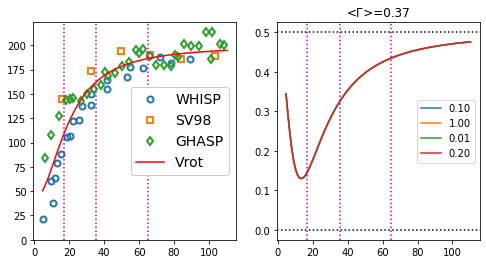

In [39]:
def eval_shear(xx, v_approx, dr=None):
    if dr is None:
        dr = (np.max(xx)-np.min(xx))/100.
    
    shear = 0.5 * (1 - xx/v_approx(xx) * (v_approx(xx+dr/2) - v_approx(xx-dr/2))/dr)
#     shear = (v_approx(xx+dr/2) - v_approx(xx-dr/2))/dr
    return dr,shear
    

fig = plt.figure(figsize=[8,4])

for ind, name_ in enumerate(['NGC3893']):
    ax = plt.subplot(121)
    comb_rot = None
    fnames = rot_data[name_]
    label_i = 0
    for xx,yy,label in fnames:
        ax.plot(xx, yy, ['o', 's', 'd'][label_i], label=label, markerfacecolor="None", markeredgewidth=2)
        
        if comb_rot is None:
            comb_rot = np.array([xx, yy]).T
        else:
            comb_rot = np.concatenate([comb_rot, np.array([xx, yy]).T])
        
        label_i += 1
    
#     if name_ == 'NGC5371':
#         comb_rot = np.concatenate([comb_rot, np.array([[0], [0]]).T])
    
    comb_rot = comb_rot[comb_rot[:, 0].argsort()]
    

    param, param_cov = curve_fit(simple_velocity_approx, comb_rot[:,0], comb_rot[:,1])

    points = np.linspace(min(comb_rot[:,0]), max(comb_rot[:,0])+2, 100)
    ax.plot(points, simple_velocity_approx(points, param[0], param[1], param[2]), color='r', label='Vrot')

    
    
    ax.legend(loc='right', fontsize=14, facecolor='white', framealpha=1)
    ax.set_ylim(0)
    ax.axvline(x=16.8, ls=':', color='m')
    ax.axvline(x=35.5, ls=':', color='m')
    ax.axvline(x=65.0, ls=':', color='m')

    
    
    ax = plt.subplot(122)
    
    for dr in [0.1, 1, 0.01, 0.2]:
        dr,shear = eval_shear(points, lambda l: simple_velocity_approx(l, param[0], param[1], param[2]), dr=dr)
        ax.plot(points, shear, '-', label=f'{dr:2.2f}')
    
    ax.set_title(f'<Г>={np.average(shear):2.2f}')
    
#     ax.set_ylim(-2.5)
    ax.axvline(x=16.8, ls=':', color='m')
    ax.axvline(x=35.5, ls=':', color='m')
    ax.axvline(x=65.0, ls=':', color='m')
    ax.axhline(y=0.0, ls=':', color='k')
    ax.axhline(y=0.5, ls=':', color='k')
    ax.legend()

# SPARC

3893 and 2403 are in SPARC http://astroweb.cwru.edu/SPARC/ (which is a compilation itself) 

BTW h_disk = 24 arcsec = 32pixx0.75 (S4G), h_disk = 2.38 kpc = 27.5 arcsec (D=18Mpc, 3.6 from SPARC)

# reg-file

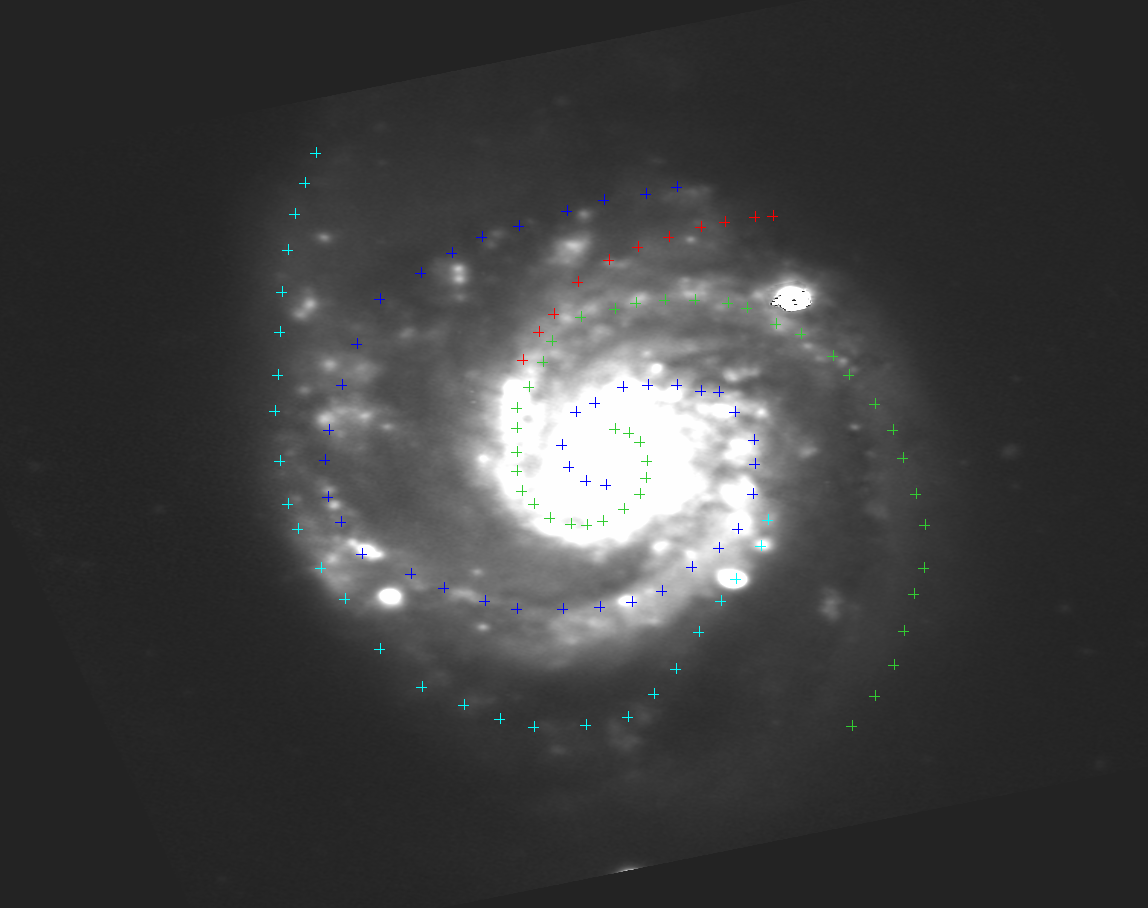

In [48]:
# scale = 0.262 arcsec in pix
Image('/home/amarch/Pictures/Screenshot from 2025-03-06 18-38-49.png',width=500)

In [54]:
xcen = 762
ycen = 500

spirals = {}
with open('/mnt/sdb2/science/spirals/crs_coupling/fits/NGC3893_dr8_g_deproject_.reg', 'r') as inpf:
    ll = inpf.readlines()[3:]
    for li in ll:
        if 'color' in li:
            color = li.split('color=')[1].replace('\n', '')
        else:
            color='green'
        if color not in spirals.keys():
            spirals[color] = []
        xxyy = li.split(')')[0].replace('point(', '')
        xx,yy = float(xxyy.split(',')[0]), float(xxyy.split(',')[1])
        xv = xx-xcen
        yv = yy-ycen
        phi = np.arctan2(xv,yv)*180/np.pi
        r = sqrt(xv**2 + yv**2)
        spirals[color].append([r,phi])

green rmax is = 94.15 arcsec
red rmax is = 74.92 arcsec
blue rmax is = 76.25 arcsec
cyan rmax is = 111.53 arcsec


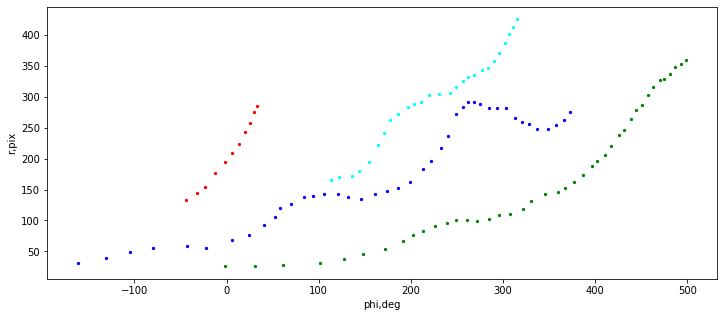

In [113]:
fig = plt.figure(figsize=[12,5])
for color in spirals.keys():
#     print(color)
    pts = spirals[color]
    rr = np.array([_[0] for _ in pts])
    phis = np.array([_[1] for _ in pts])
    
    
#     print(phis)
    if color in ['cyan']:
        phis = np.array([_[1] if _[1] > 0 else 360.+_[1] for _ in pts])
    if color in ['blue']:
        phis = np.array([_[1] if _[0] < 148 else 360.+_[1] for _ in pts])
    if color in ['green']:
        phis = np.array([_[1] if _[0] < 55 else 360.+_[1] for _ in pts])
#     plt.gca().axhline(y=55)
    print(f'{color} rmax is = {np.max(rr)*0.262:2.2f} arcsec')
    rr, phis = zip(*sorted(zip(rr,phis), key=lambda l: l[1]))
    plt.scatter(phis, rr, 5,color=color)
    
plt.xlabel('phi,deg')
plt.ylabel('r,pix')
plt.show()

green pitch = 17.95214deg
red pitch = 29.73541deg
blue pitch = 13.18006deg
cyan pitch = 13.93749deg


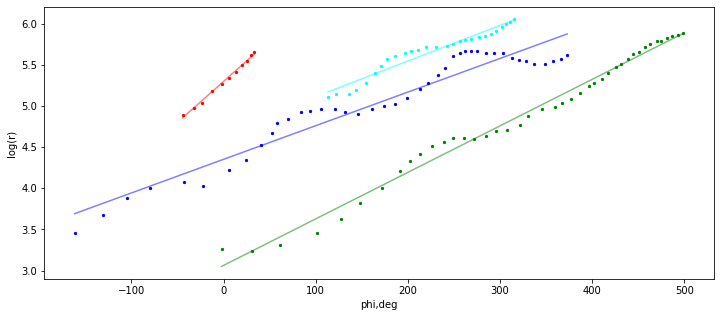

In [112]:
from scipy.stats import linregress

fig = plt.figure(figsize=[12,5])
for color in spirals.keys():
    pts = spirals[color]
    rr = np.array([_[0] for _ in pts])
    phis = np.array([_[1] for _ in pts])
    if color in ['cyan']:
        phis = np.array([_[1] if _[1] > 0 else 360.+_[1] for _ in pts])
    if color in ['blue']:
        phis = np.array([_[1] if _[0] < 148 else 360.+_[1] for _ in pts])
    if color in ['green']:
        phis = np.array([_[1] if _[0] < 55 else 360.+_[1] for _ in pts])
    rr, phis = zip(*sorted(zip(rr,phis), key=lambda l: l[1]))
    rr, phis = np.array(rr), np.array(phis)
    plt.scatter(phis, np.log(rr), 5,color=color)
    
    res = linregress(phis, np.log(rr))
    plt.plot(phis, res.intercept + phis*res.slope, color=color, alpha=0.5)
    pitch = np.arctan(res.slope*180/np.pi)*180/np.pi
    print(f'{color} pitch = {pitch:2.5f}deg')
    
plt.xlabel('phi,deg')
plt.ylabel('log(r)')
plt.show()

# run again

In [5]:
def resonance_alpha(alpha, m=0):
    rat = 1+sqrt(2)*sqrt(1+alpha)/m
    return np.power(rat, 1/(1-alpha))

In [55]:
# for CR
resonance_alpha(0.5, m=10000)

1.0003464401615136

In [22]:
res_dict = {}
al = np.linspace(-0.99, 0.99, 500)
for m_ in [-4, -2, 1000, 2, 4]:
    res = [resonance_alpha(al_, m=m_) for al_ in al]
    res_dict[m_] = res

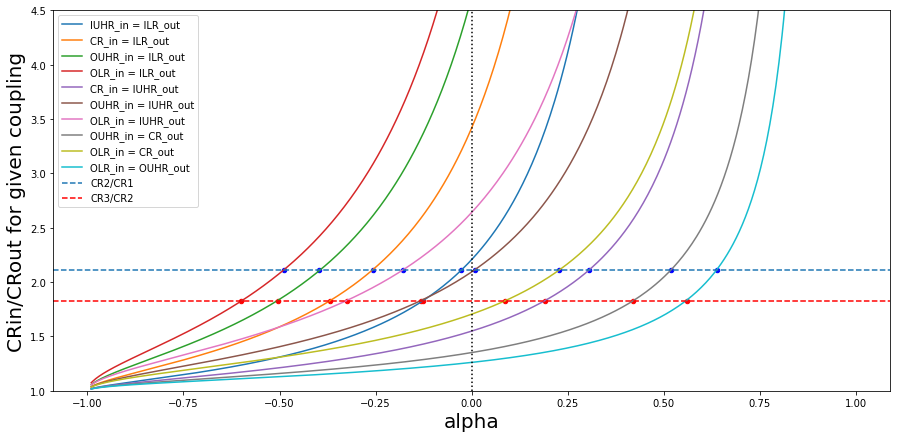

In [31]:
resonance_names = ['ILR', 'IUHR', 'CR', 'OUHR', 'OLR']

# for NGC3893
upomega_1 = 2.11
upomega_2 = 1.83

fig = plt.figure(figsize=[15, 7])
al= np.linspace(-0.99, 0.99, 500)
for ind1,m1 in enumerate([-2, -4, 1000, 4, 2]):
    for ind2,m2 in enumerate([-2, -4, 1000, 4, 2]):
        res1 = res_dict[m1]
        res2 = res_dict[m2]
        if ind2<=ind1:
            continue
        res = np.array(res2)/np.array(res1)
        plt.plot(al, res, '-', label=f'{resonance_names[ind2]}_in = {resonance_names[ind1]}_out')


plt.ylim(1.,4.5)
plt.axhline(y=upomega_1, ls='--', label='CR2/CR1')
# plt.axvline(x=0.31, ls=':', lw=2)
# plt.axvline(x=0.52, ls=':')

upomega1_alpha = []
for ind1,m1 in enumerate([-2, -4, 1000, 4, 2]):
    for ind2,m2 in enumerate([-2, -4, 1000, 4, 2]):
        res1 = res_dict[m1]
        res2 = res_dict[m2]
        if ind2<=ind1:
            continue
        res = np.array(res2)/np.array(res1)
        dd = (al[np.where(res>=upomega_1)[0][0]] + al[np.where(res<upomega_1)[0][-1]])*0.5
        plt.scatter(dd, upomega_1, 20, color='b')
        upomega1_alpha.append([dd, ind2, ind1])


plt.axhline(y=upomega_2, ls='--', c='r', label='CR3/CR2')
# plt.axvline(x=0.2, ls=':', c='r', lw=2)
# plt.axvline(x=0.09, ls=':', c= 'r')

upomega2_alpha = []
for ind1,m1 in enumerate([-2, -4, 1000, 4, 2]):
    for ind2,m2 in enumerate([-2, -4, 1000, 4, 2]):
        res1 = res_dict[m1]
        res2 = res_dict[m2]
        if ind2<=ind1:
            continue
        res = np.array(res2)/np.array(res1)
        dd = (al[np.where(res>=upomega_2)[0][0]] + al[np.where(res<upomega_2)[0][-1]])*0.5
        plt.scatter(dd, upomega_2, 20, color='r')
        upomega2_alpha.append([dd, ind2, ind1])


# plt.axhline(y=1.71, ls='--', c='g', label='NGC628')
plt.axvline(x=0, color='k', ls=':')

plt.xlabel('alpha', fontsize=20)
plt.ylabel('CRin/CRout for given coupling', fontsize=20)
plt.legend()
plt.show()

In [ ]:
# crrrs = [(12.5 , 21.2), (32.0, 39.1), (59.5,70.5)]
# cr1 = 16.5
# cr2 = 35.5
# cr3 = 66.0

# OLR_In = CR_out
# alpha = 0.226
# 0.22617234468937886, 4, 2


In [34]:
sorted(upomega1_alpha)

[[-0.4880561122244489, 4, 0],
 [-0.39679358717434865, 3, 0],
 [-0.25791583166332666, 2, 0],
 [-0.17855711422845688, 4, 1],
 [-0.02777555110220442, 1, 0],
 [0.007935871743486977, 3, 1],
 [0.22617234468937886, 4, 2],
 [0.3055310621242484, 2, 1],
 [0.5197995991983968, 3, 2],
 [0.6388376753507015, 4, 3]]

In [35]:
sorted(upomega2_alpha)

[[-0.5991583166332666, 4, 0],
 [-0.5039278557114228, 3, 0],
 [-0.36901803607214423, 2, 0],
 [-0.32537074148296596, 4, 1],
 [-0.13094188376753502, 3, 1],
 [-0.12697394789579153, 1, 0],
 [0.08729458917835675, 4, 2],
 [0.19046092184368746, 2, 1],
 [0.4206012024048096, 3, 2],
 [0.5594789579158317, 4, 3]]

In [36]:
upomega1_alpha = np.array(sorted(upomega1_alpha))
upomega2_alpha = np.array(sorted(upomega2_alpha))

In [30]:
rot_data = {'NGC3893': [[array([10.67669173, 11.74299385, 12.91866029, 15.47505126, 20.58783322,
          25.72795625, 32.20779221, 41.32604238, 53.13738893, 62.3239918 ,
          78.18181818,  4.6479836 ,  9.55570745, 18.38687628, 22.20095694,
          27.35475051, 32.53588517, 41.66780588, 54.79152427, 71.93438141,
          89.18660287]),
   array([ 37.47290107,  63.42069483,  78.4399239 ,  87.98732329,
          107.08212207, 123.44477967, 138.43381935, 154.7738349 ,
          167.000544  , 176.51020663, 181.88392075,  21.17756584,
           60.76342338, 105.79092121, 122.16112617, 137.15771319,
          149.42215904, 164.39610401, 177.98133634, 187.44571487,
          185.98152872]),
   'WHISP'],
  [array([ 15.75013798,  32.46340307,  49.50924799,  66.01784857,
           83.74841666, 103.5978644 ]),
   array([144.40901072, 173.54729271, 193.820057  , 189.95250373,
          186.09037861, 188.64160673]),
   'SV98'],
  [array([  5.79538804,   9.7164861 ,  14.01429126,  18.11282525,
           20.24048274,  21.98435141,  26.42359386,  30.1135531 ,
           34.18671099,  38.25750832,  40.22130313,  41.95041826,
           46.40677483,  50.09555377,  54.360311  ,  58.44645202,
           59.79531919,  62.12401827,  65.97606975,  69.82162968,
           74.46250387,  78.135349  ,  80.4799819 ,  82.21499845,
           85.53356185,  89.97634515,  94.03592979,  98.12915251,
          101.99772795, 101.16110376, 106.41690559, 108.34765247]),
   array([ 83.57540149, 107.64087349, 127.20955018, 144.13345071,
          144.3959373 , 145.98126862, 142.27412503, 149.41204325,
          154.96262085, 159.45521492, 172.94267827, 167.91561255,
          171.87884953, 178.48777599, 183.24468328, 194.61417029,
          192.49692459, 196.19767498, 189.31712879, 179.5271279 ,
          179.52274399, 178.99028163, 189.83242084, 187.45031393,
          201.46549041, 199.34532211, 198.81249442, 213.35593201,
          213.88127052, 185.5809418 , 201.18126694, 199.8569609 ]),
   'GHASP']],}

In [39]:
NN = 0
for alp_in in upomega1_alpha[:,0]:
    for alp_out in upomega2_alpha[:,0]:
        if alp_out > alp_in:
            continue
        NN+=1
        
print(NN)

59


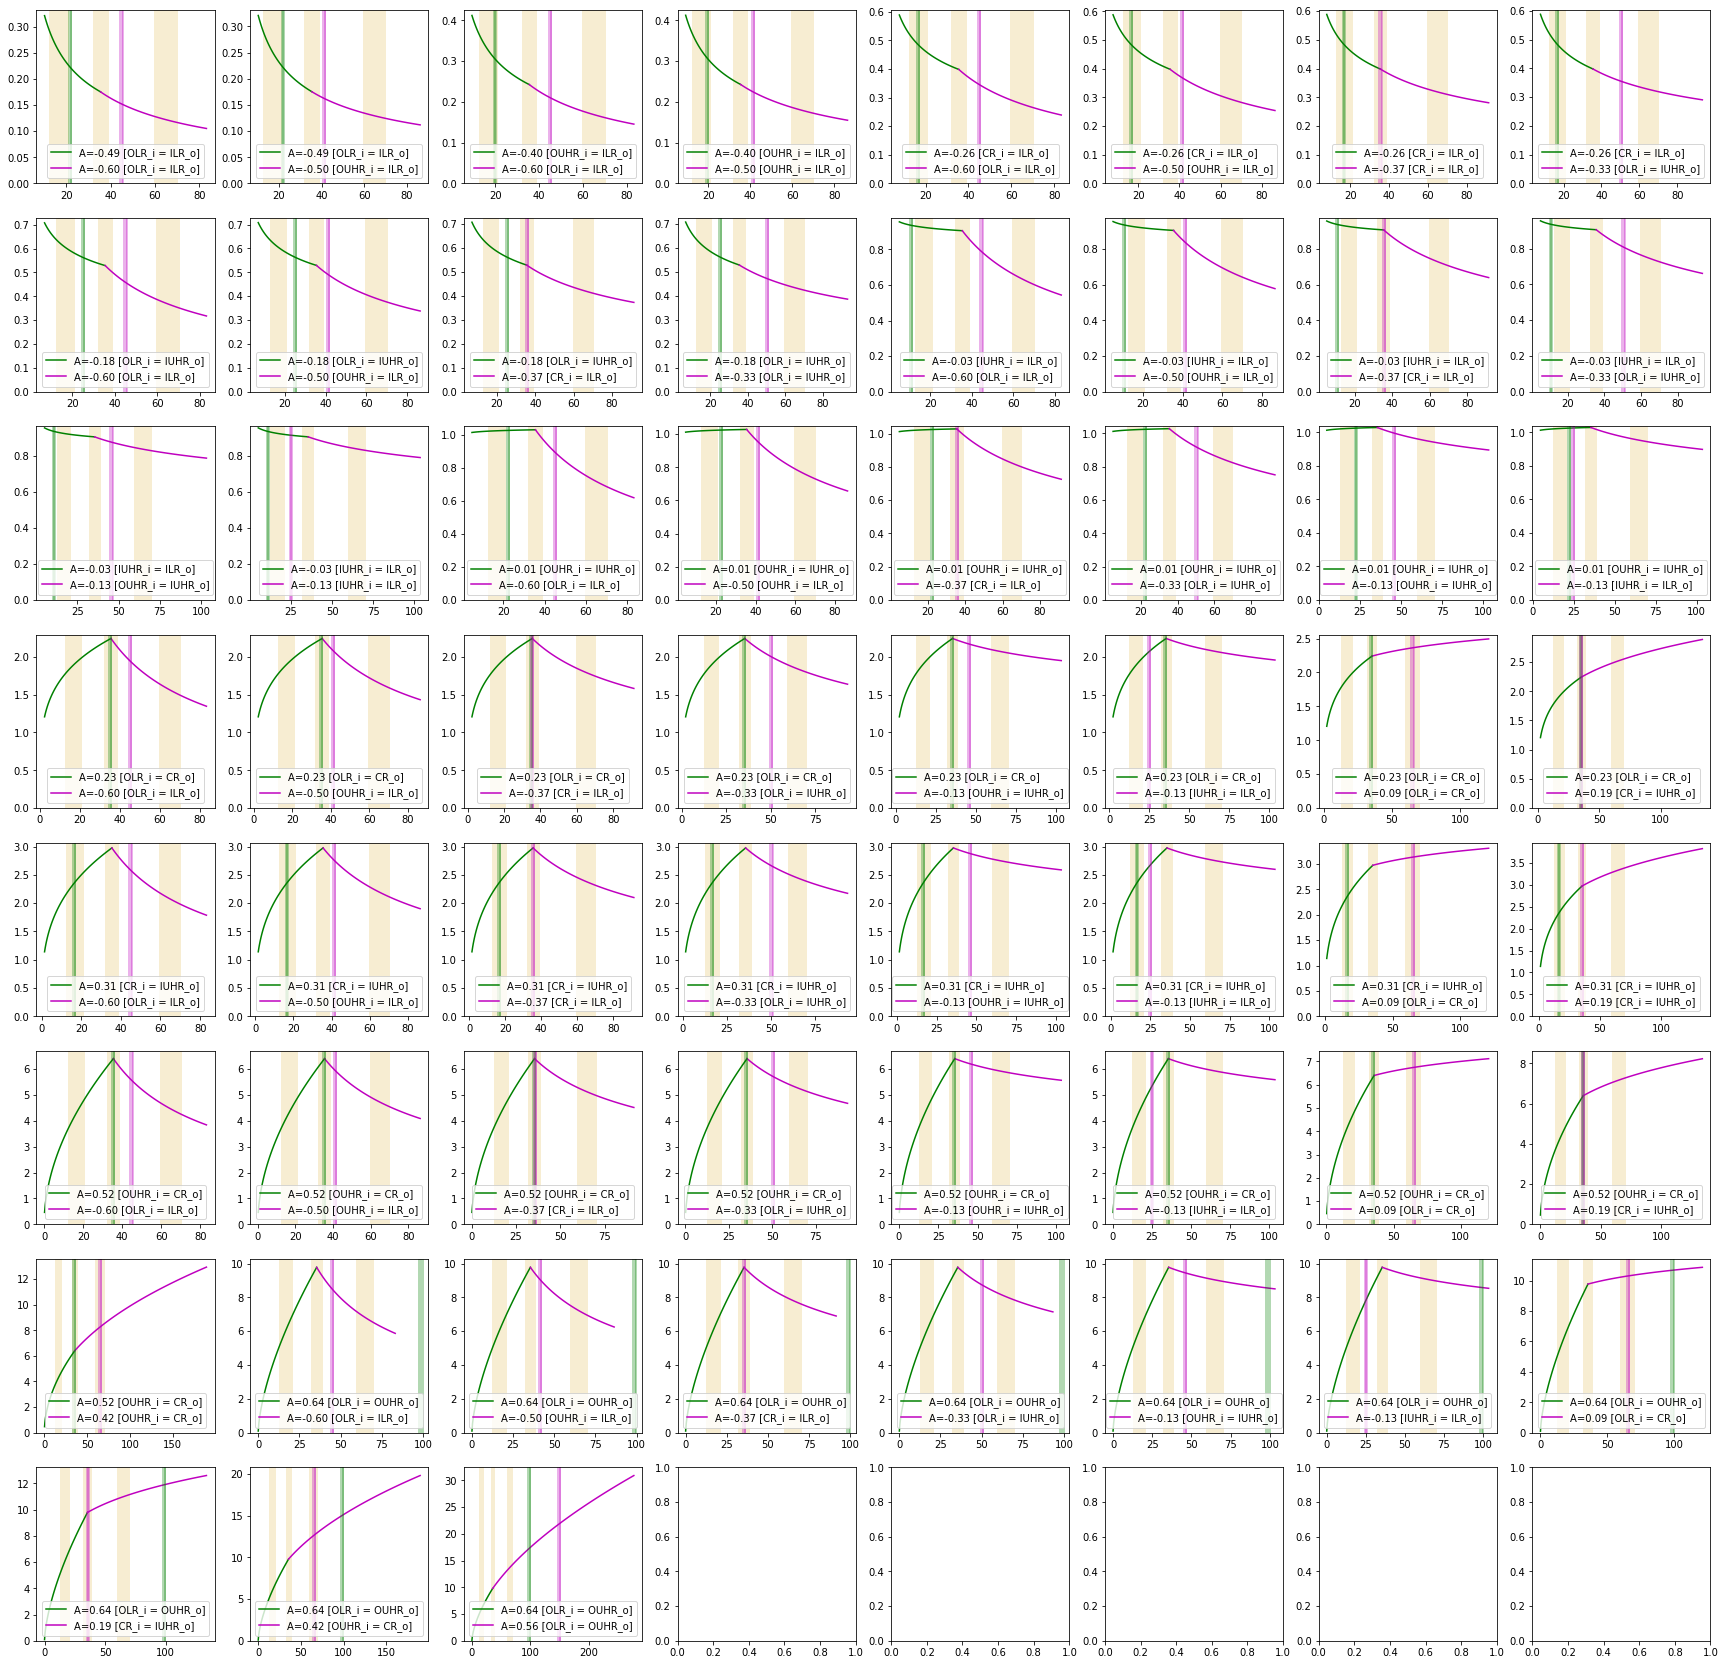

In [59]:
def rotvel_alpha_unityarea(rs, alpha=0., rh=1., v0=1):
    vel = v0*np.power(rs/(rh), alpha)
    return vel

# NGC3893
crrrs = [(12.5 , 21.2), (32.0, 39.1), (59.5,70.5)]
cr1 = 16.5
cr2 = 35.5
cr3 = 66.0

fig, axes = plt.subplots(figsize=[30, 30], nrows=8, ncols=8)
axes = axes.ravel()

count = 0
for alp_in_ in upomega1_alpha:
    for alp_out_ in upomega2_alpha:
        
        alp_in, ind2_in, ind1_in = alp_in_
        alp_out, ind2_out, ind1_out = alp_out_
        
        if alp_out > alp_in:
            continue
        
        ax = axes[count]
        
        ilr_in1 = resonance_alpha(alp_in, m=-2)*cr1
        olr_out1 = cr2
        
        ilr_in2 = cr2
        olr_out2 = resonance_alpha(alp_out, m=2)*cr3
                
        pts1 = np.linspace(ilr_in1, olr_out1, 100)
        vel1 = rotvel_alpha_unityarea(pts1, alpha=alp_in)
        ax.plot(pts1, vel1, '-', color='g', label=f'A={alp_in:2.2f} [{resonance_names[int(ind2_in)]}_i = {resonance_names[int(ind1_in)]}_o]')
        
        pts2 = np.linspace(ilr_in2, olr_out2, 100)
        vel2 = rotvel_alpha_unityarea(pts2, alpha=alp_out)
        coeff = vel1[-1]/vel2[0]
#         coeff = 1.
        ax.plot(pts2, vel2*coeff, '-', color='m', label=f'A={alp_out:2.2f} [{resonance_names[int(ind2_out)]}_i = {resonance_names[int(ind1_out)]}_o]')
        
        for cr_l,cr_r in crrrs:
            ax.axvspan(cr_r, cr_l, facecolor='goldenrod', alpha=0.2)
        
        ax.set_ylim(0)
        y1,y2 = ax.get_ylim()
        
        mms = [-2, -4, 1000, 4, 2]
        
        r1loc = resonance_alpha(alp_in, m=mms[int(ind2_in)])*cr1
        r2loc = resonance_alpha(alp_in, m=mms[int(ind1_in)])*cr2
#         ax.scatter(r1loc, y1, 10, color='g')
#         ax.scatter(r2loc, y2, 10, color='g')
        ax.axvline(x=r1loc, color='g', alpha=0.3, lw=4)
        ax.axvline(x=r2loc, color='g', alpha=0.3, lw=2)
        
        r1loc = resonance_alpha(alp_out, m=mms[int(ind2_out)])*cr2
        r2loc = resonance_alpha(alp_out, m=mms[int(ind1_out)])*cr3
#         ax.scatter(r1loc, y1, 10, color='m')
#         ax.scatter(r2loc, y2, 10, color='m')
        ax.axvline(x=r1loc, color='m', alpha=0.3, lw=4)
        ax.axvline(x=r2loc, color='m', alpha=0.3, lw=2)
        
        ax.legend(loc=8)
        count+=1
plt.show()

Only reasonable:

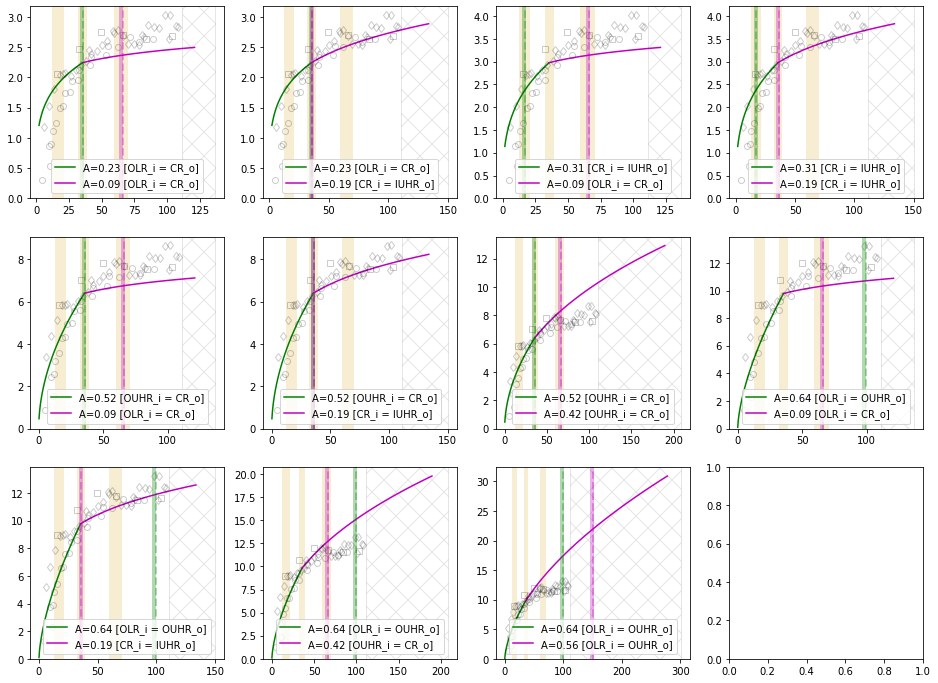

In [73]:
def rotvel_alpha_unityarea(rs, alpha=0., rh=1., v0=1):
    vel = v0*np.power(rs/(rh), alpha)
    return vel

# NGC3893
crrrs = [(12.5 , 21.2), (32.0, 39.1), (59.5,70.5)]
cr1 = 16.5
cr2 = 35.5
cr3 = 66.0

fig, axes = plt.subplots(figsize=[16, 12], nrows=3, ncols=4)
axes = axes.ravel()

count = 0
for alp_in_ in upomega1_alpha:
    for alp_out_ in upomega2_alpha:
        
        alp_in, ind2_in, ind1_in = alp_in_
        alp_out, ind2_out, ind1_out = alp_out_
        
        if alp_out > alp_in or alp_out*alp_in<0 or alp_in <0:
            continue
        
        ax = axes[count]
        
        ilr_in1 = resonance_alpha(alp_in, m=-2)*cr1
        olr_out1 = cr2
        
        ilr_in2 = cr2
        olr_out2 = resonance_alpha(alp_out, m=2)*cr3
                
        pts1 = np.linspace(ilr_in1, olr_out1, 100)
        vel1 = rotvel_alpha_unityarea(pts1, alpha=alp_in)
        ax.plot(pts1, vel1, '-', color='g', label=f'A={alp_in:2.2f} [{resonance_names[int(ind2_in)]}_i = {resonance_names[int(ind1_in)]}_o]')
        
        pts2 = np.linspace(ilr_in2, olr_out2, 100)
        vel2 = rotvel_alpha_unityarea(pts2, alpha=alp_out)
        coeff = vel1[-1]/vel2[0]
#         coeff = 1.
        ax.plot(pts2, vel2*coeff, '-', color='m', label=f'A={alp_out:2.2f} [{resonance_names[int(ind2_out)]}_i = {resonance_names[int(ind1_out)]}_o]')
        
        for cr_l,cr_r in crrrs:
            ax.axvspan(cr_r, cr_l, facecolor='goldenrod', alpha=0.2)
            
        cf2 = vel1[-1]/158.
        for ind, name_ in enumerate(['NGC3893']):
            fnames = rot_data[name_]
            label_i = 0
            for xx,yy,label in fnames:
                ax.plot(xx, yy*cf2, ['o', 's', 'd'][label_i], markerfacecolor="None", markeredgewidth=1, color='k', alpha=0.2)
                label_i+=1
        
        ax.set_ylim(0)
        y1,y2 = ax.get_ylim()
        
        
        mms = [-2, -4, 1000, 4, 2]
        
        r1loc = resonance_alpha(alp_in, m=mms[int(ind2_in)])*cr1
        r2loc = resonance_alpha(alp_in, m=mms[int(ind1_in)])*cr2
#         ax.scatter(r1loc, y1, 10, color='g')
#         ax.scatter(r2loc, y2, 10, color='g')
        ax.axvline(x=r1loc, color='g', alpha=0.3, lw=4)
        ax.axvline(x=r2loc, color='g', alpha=0.3, lw=2, ls='--')
        
        r1loc = resonance_alpha(alp_out, m=mms[int(ind2_out)])*cr2
        r2loc = resonance_alpha(alp_out, m=mms[int(ind1_out)])*cr3
#         ax.scatter(r1loc, y1, 10, color='m')
#         ax.scatter(r2loc, y2, 10, color='m')
        ax.axvline(x=r1loc, color='m', alpha=0.3, lw=4)
        ax.axvline(x=r2loc, color='m', alpha=0.3, lw=2, ls='--')
        
        x1,x2 = ax.get_xlim()
        MAX_SPIRAL_DIST = 111 #arcsec
        ax.axvspan(MAX_SPIRAL_DIST, x2+10, alpha=0.1, facecolor='none', edgecolor='k', hatch='x')
        
        ax.legend(loc=8)
        count+=1
plt.show()